# Economic complexity and international trade: A case study on the State of Goiás (2010-2019)

Artigo publicado no PSL Quarterly sobre a economia do estado de Goiás e sua relação com o meio ambiente. Dados usados foram os da COMEX, para o cálculo do Índice de Herfindahl-Hirschman (HHI), que possui a seguinte fórmula: 

$$HHI = \sum_{i=1}^{n}s_i^2$$

Em que $s_i$ é a participação das exportações do produto de categoria $i$ no total das exportações do estado. 

##### Links:  

[Link para o artigo](https://rosa.uniroma1.it/rosa04/psl_quarterly_review/article/view/18916/17291)

[Dados da COMEX](https://comexstat.mdic.gov.br/pt/geral)

###### Obs:

A base usada para a versão do artigo possui manipulações próprias que não foram de minha autoria

# Importando os pacotes e definindo alguns parâmetros

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

C:\Users\joaop\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'Cambria'

In [3]:
valor = 'Valor FOB (US$)'
ano = 'Ano'
bloco = 'Bloco Econômico Destino'


In [4]:
caminho_arquivo = r"Gráficos PSL.xlsx"


# Importando os dados

In [5]:
df = pd.read_excel(r"Tabelas - Projeto MESP 2022.09.02.xlsx", sheet_name = 'Dados Brutos - Comex')

blocos = ['Mercado Comum do Sul - Mercosul',
          'Comunidade Andina das Nações - CAN',
          'União Europeia - UE',
          'Associação de Nações do Sudeste Asiático - ASEAN']

df = df[~df[bloco].isin(blocos)]

df

,Código SH2,Descrição SH2,Código SH4,Descrição SH4,Código SH6,Descrição SH6,Código NCM,Descrição NCM,Código - Classificação Tecnológica,Descrição - Classificação Tecnológica,País Destino,Bloco Econômico Destino,Valor FOB (US$),Quilograma Líquido,Quantidade Estatística,Ano,Fonte
0,1,Animais vivos,101,"Cavalos, asininos e muares, vivos",10111,"Cavalos reprodutores, de raça pura",1011100,"Cavalos reprodutores, de raça pura",PP,Produtos Primários,Estados Unidos,América do Norte,1800,420,1,2000,http://comexstat.mdic.gov.br/pt/geral/130949
1,1,Animais vivos,101,"Cavalos, asininos e muares, vivos",10121,Cavalos reprodutores de raça pura,1012100,Cavalos reprodutores de raça pura,PP,Produtos Primários,Estados Unidos,América do Norte,12500,450,1,2013,http://comexstat.mdic.gov.br/pt/geral/98650
2,1,Animais vivos,101,"Cavalos, asininos e muares, vivos",10190,"Animais vivos das espécies cavalar, asinina e ...",1019010,"Cavalos vivos, exceto reprodutores raça pura",PP,Produtos Primários,Uruguai,América do Sul,46500,1000,2,2010,http://comexstat.mdic.gov.br/pt/geral/107870
4,1,Animais vivos,101,"Cavalos, asininos e muares, vivos",10190,"Animais vivos das espécies cavalar, asinina e ...",1019010,"Cavalos vivos, exceto reprodutores raça pura",PP,Produtos Primários,Argentina,América do Sul,7000,500,1,2009,http://comexstat.mdic.gov.br/pt/geral/111146
6,1,Animais vivos,101,"Cavalos, asininos e muares, vivos",10190,"Animais vivos das espécies cavalar, asinina e ...",1019010,"Cavalos vivos, exceto reprodutores raça pura",PP,Produtos Primários,Argentina,América do Sul,9000,1500,3,2008,http://comexstat.mdic.gov.br/pt/geral/113880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73043,99,Transações especiais,9998,Consumo de bordo (combustíveis e lubrificantes...,999802,Consumo de bordo para embarcações e aeronaves ...,99980201,Consumo de bordo - qualquer outra mercadoria p...,Other,Outros,Venezuela,América do Sul,77913,341820,341820,2012,http://comexstat.mdic.gov.br/pt/geral/101576
73044,99,Transações especiais,9998,Consumo de bordo (combustíveis e lubrificantes...,999802,Consumo de bordo para embarcações e aeronaves ...,99980201,Consumo de bordo - qualquer outra mercadoria p...,Other,Outros,Venezuela,América do Sul,231887,829280,829280,2009,http://comexstat.mdic.gov.br/pt/geral/110291
73045,99,Transações especiais,9998,Consumo de bordo (combustíveis e lubrificantes...,999802,Consumo de bordo para embarcações e aeronaves ...,99980201,Consumo de bordo - qualquer outra mercadoria p...,Other,Outros,Líbano,Oriente Médio,279606,1671980,1671980,2008,http://comexstat.mdic.gov.br/pt/geral/113016
73046,99,Transações especiais,9998,Consumo de bordo (combustíveis e lubrificantes...,999802,Consumo de bordo para embarcações e aeronaves ...,99980201,Consumo de bordo - qualquer outra mercadoria p...,Other,Outros,Venezuela,América do Sul,215317,764620,764620,2008,http://comexstat.mdic.gov.br/pt/geral/113054


[Text(0.5, 0, 'Year'), Text(0, 0.5, 'USD billion'), (1997.0, 2021.0)]

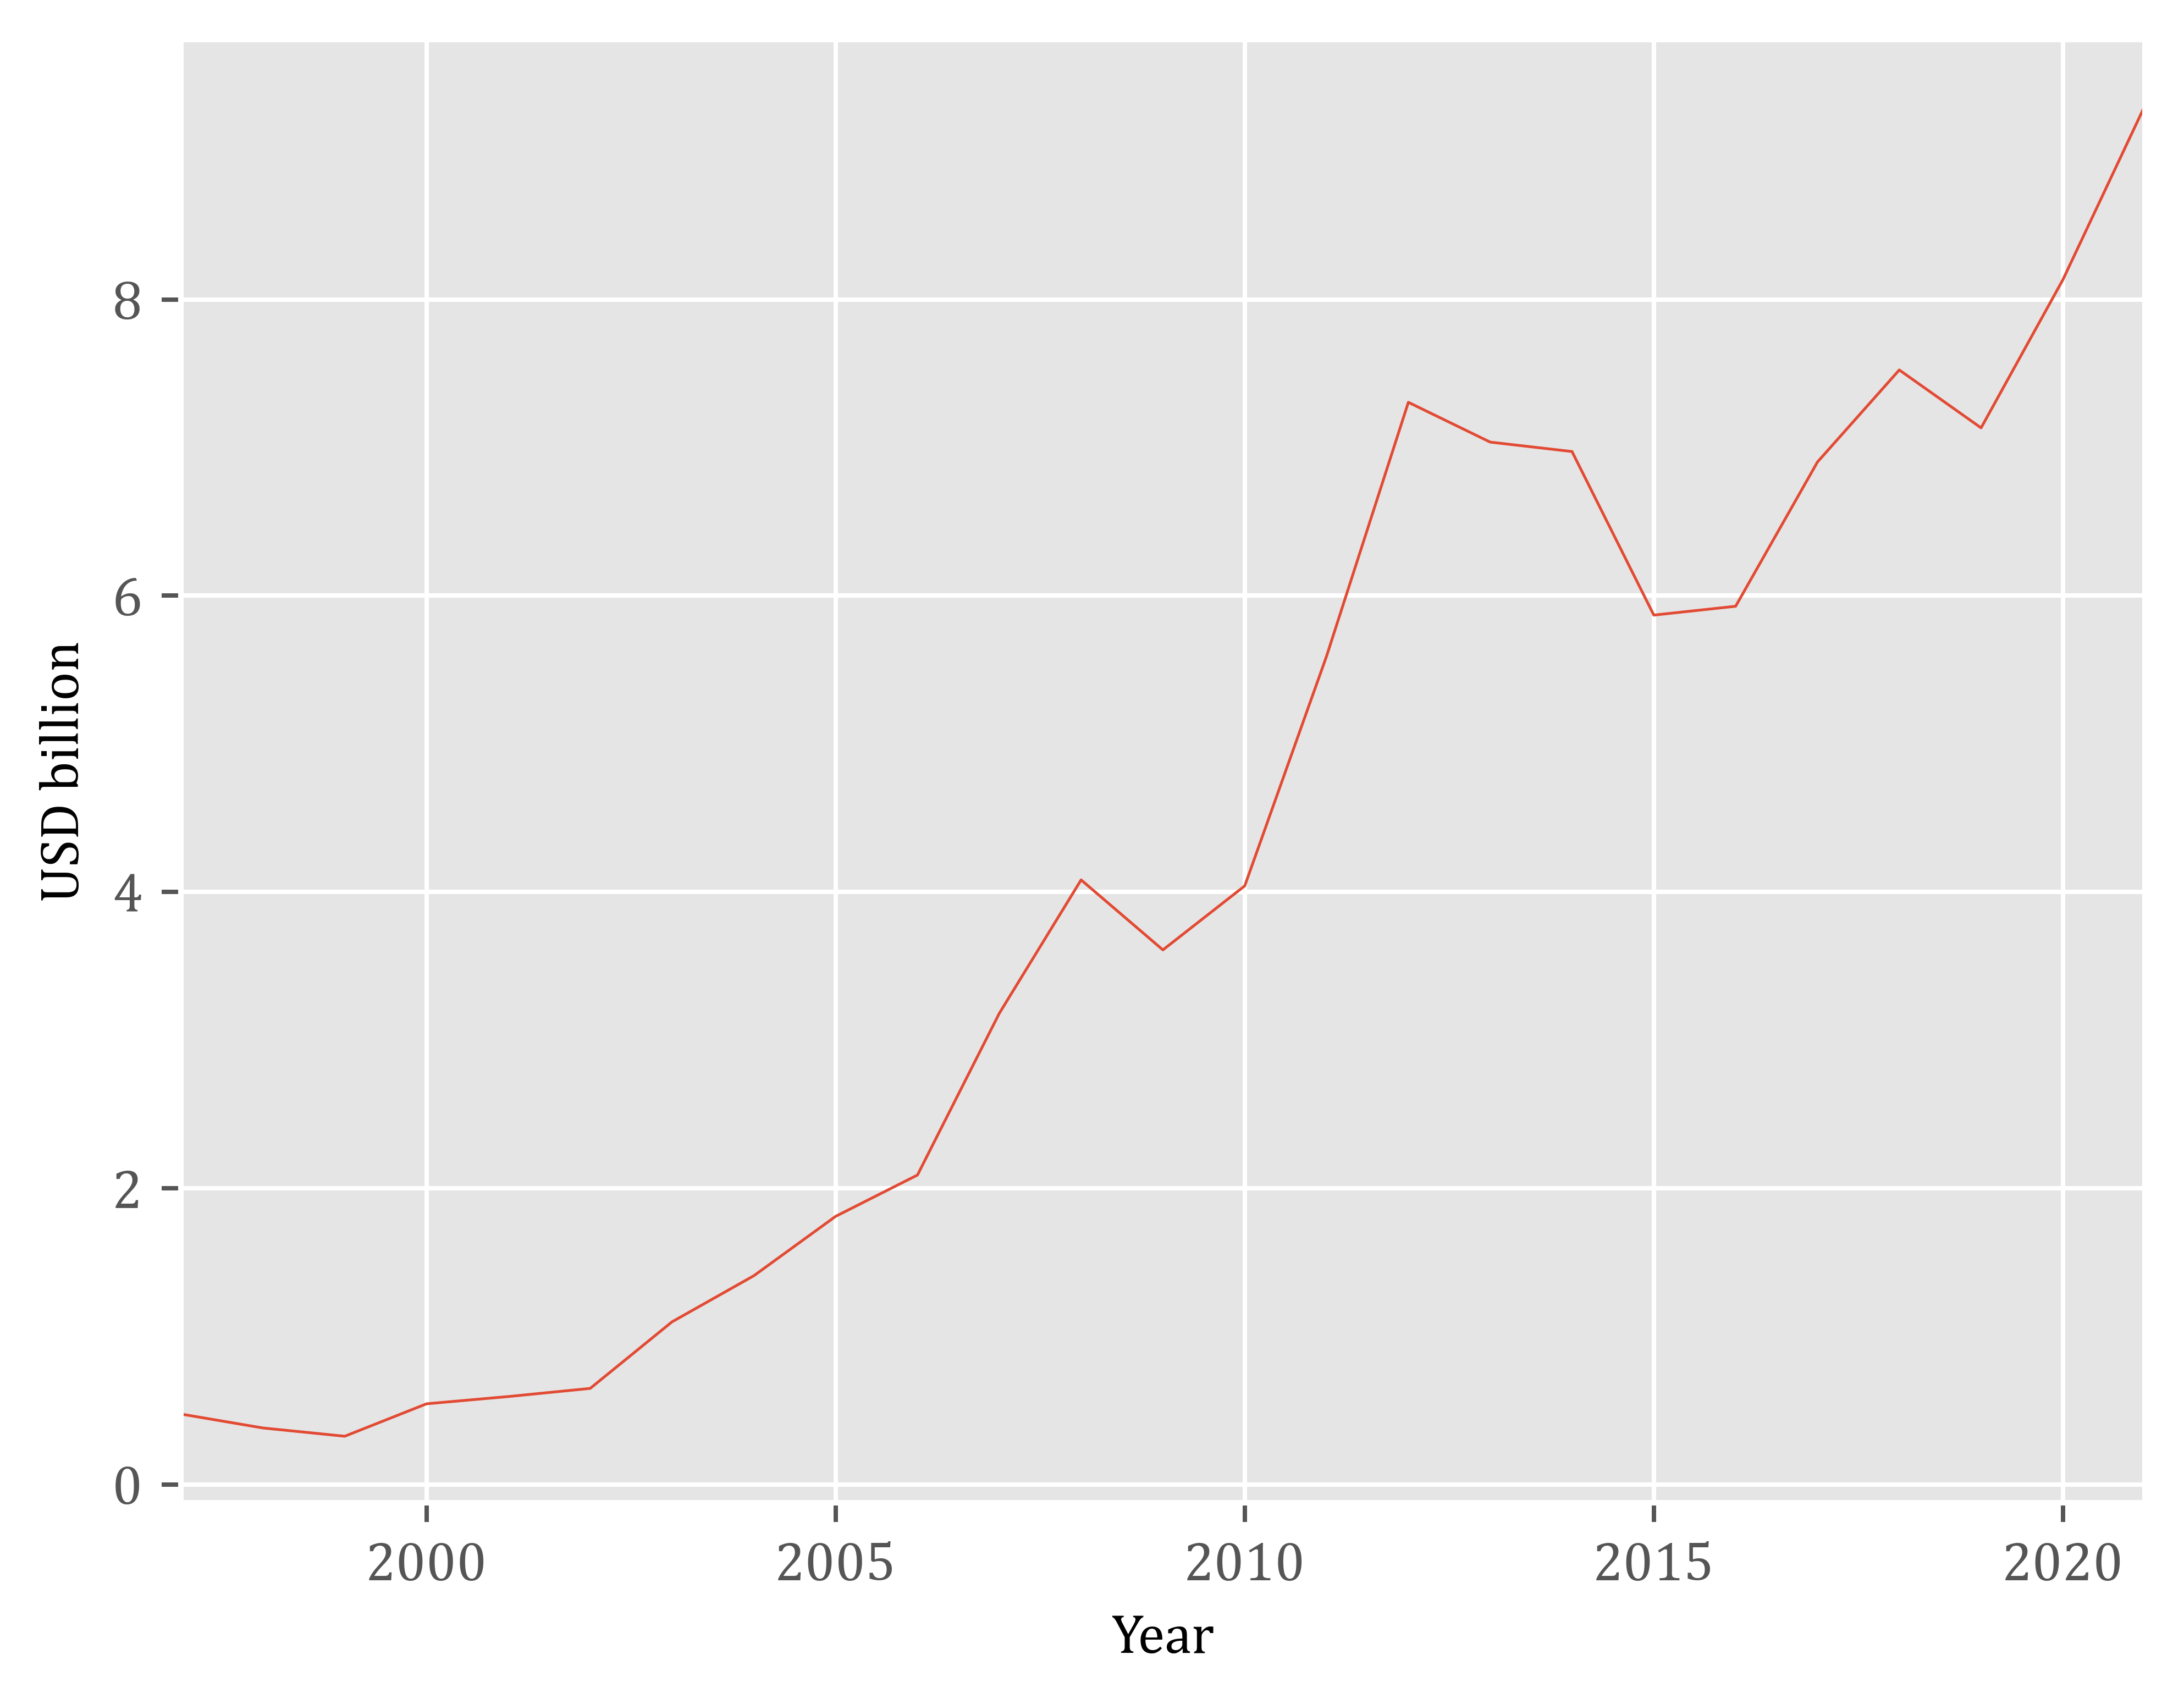

In [6]:
# Volume total exportado

df1 = df[[valor,ano]].groupby(ano, as_index = False).sum()

fig, ax = plt.subplots(dpi = 720)

with pd.ExcelWriter(caminho_arquivo, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    df1.to_excel(writer, sheet_name='grafico 2', index=False)

ax.plot(df1[ano], df1[valor]/1000000000, linewidth = 0.5)

ax.set(xlabel = 'Year',
       ylabel = 'USD billion',
       xlim = (1997,2021))

# HHI Países 

In [7]:
# Definindo função do HHI

def HHI(vetor): 
    
    total = np.sum(vetor)
    
    shares = vetor/total
    
    hhi = np.sum([i**2 for i in shares])
    
    return hhi

In [8]:
# HHI por regiões 

df1 = df[[ano,bloco,valor]].groupby([ano,bloco], as_index = False).sum()



C:\Users\joaop\AppData\Local\Temp\ipykernel_26652\2177638797.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.4332168111819197' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2.loc[df2[ano] == i, 'HHI'] = HHI(df1.loc[df1[ano] == i,valor])


[Text(0.5, 0, 'Year'), Text(0, 0.5, 'HHI'), (1997.0, 2021.0)]

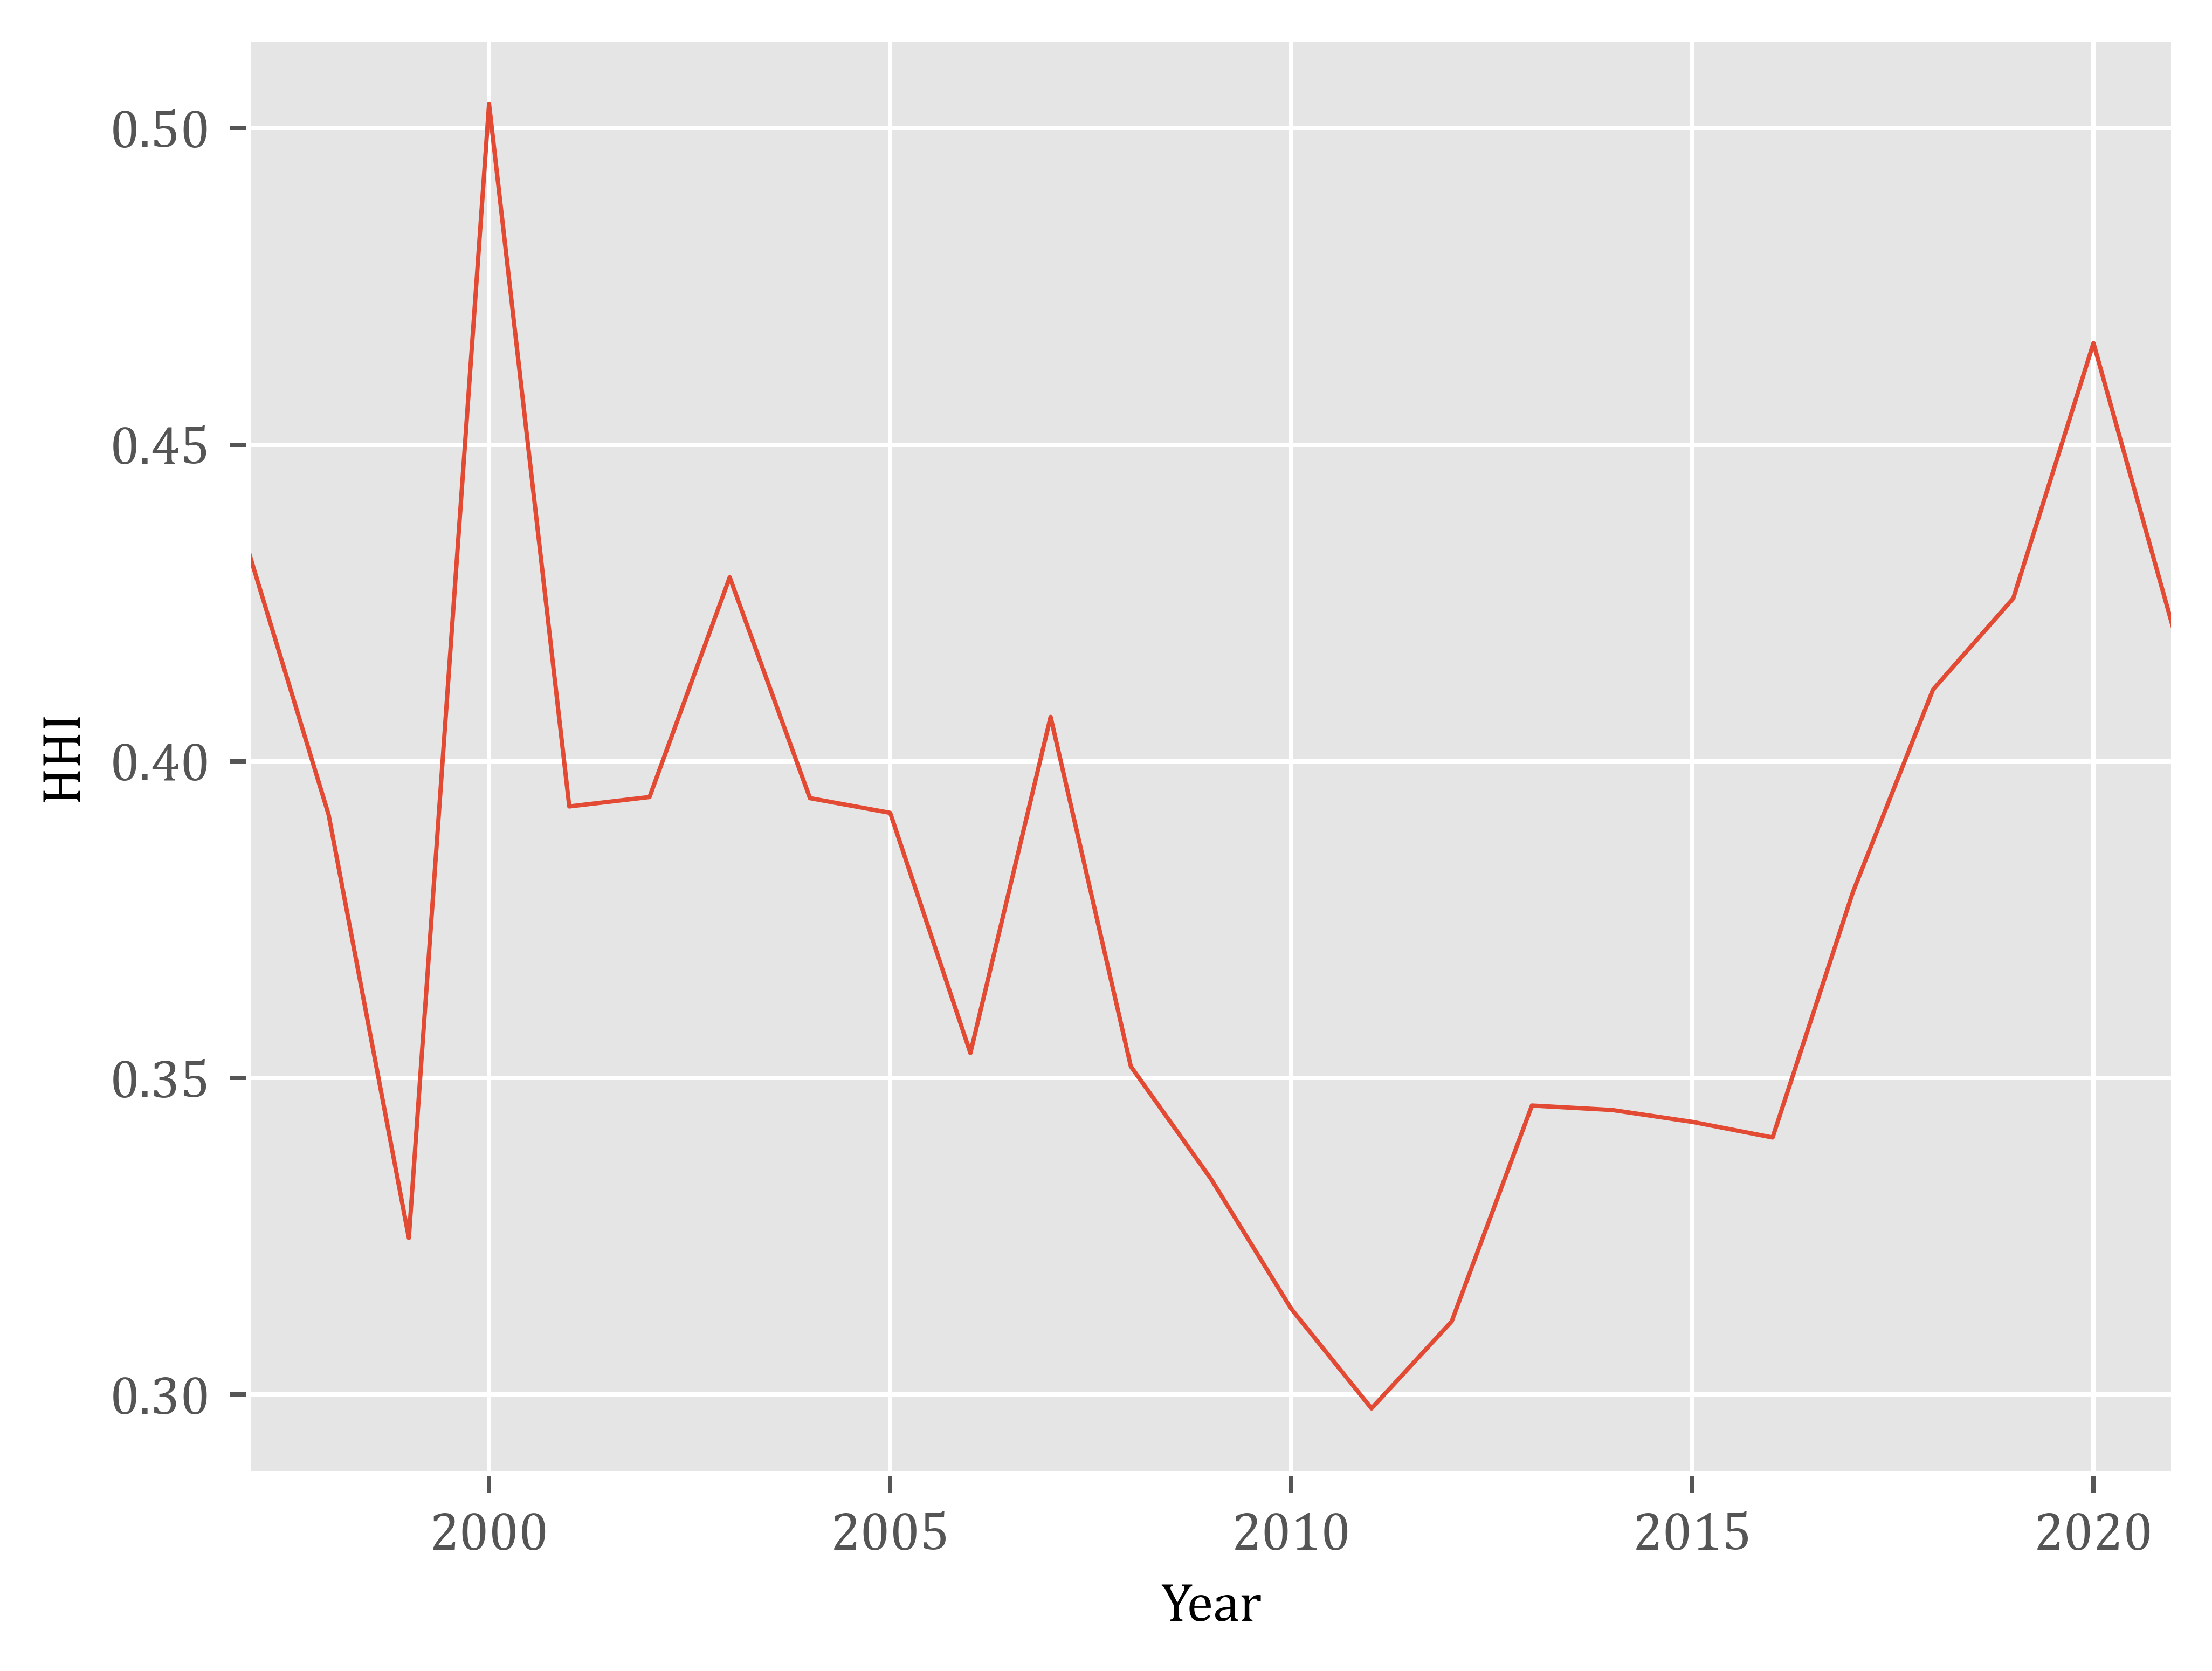

In [9]:
df2 = df[[ano,valor]].groupby([ano], as_index = False).sum()

df2['HHI'] = 0

for i in df2[ano]:

    df2.loc[df2[ano] == i, 'HHI'] = HHI(df1.loc[df1[ano] == i,valor])


with pd.ExcelWriter(caminho_arquivo, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    df2.to_excel(writer, sheet_name='grafico 3', index=False)
    
    
fig, ax = plt.subplots(dpi = 720)

ax.plot(df2[ano], df2['HHI'], linewidth = 0.8),

ax.set(xlabel = 'Year',
       ylabel = 'HHI',
       xlim = (1997,2021))

# Gráfico de Barra

In [10]:
df1 = df[[valor,bloco]].groupby([bloco], as_index = False).sum()

regions_dict = {
    'Central America': 'América Central e Caribe',
    'North America': 'América do Norte',
    'South America': 'América do Sul',
    'Europe': 'Europa',
    'Oceania': 'Oceania',
    'Middle East': 'Oriente Médio',
    'Africa': 'África',
    'Asia': 'Ásia (Exclusive Oriente Médio)'
}

for i in regions_dict: 
    
    df1.loc[df1[bloco] == regions_dict[i],bloco] = i

df1

,Bloco Econômico Destino,Valor FOB (US$)
0,Central America,556011459
1,North America,3920465971
2,South America,3515707932
3,Europe,32900595259
4,Oceania,148415247
5,Middle East,7715614518
6,Africa,4624035816
7,Asia,48616323413


C:\Users\joaop\AppData\Local\Temp\ipykernel_26652\4275275191.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df1[bloco],rotation = -35, ha = 'left')


[Text(0.5, 0, 'Region'), Text(0, 0.5, 'USD billion')]

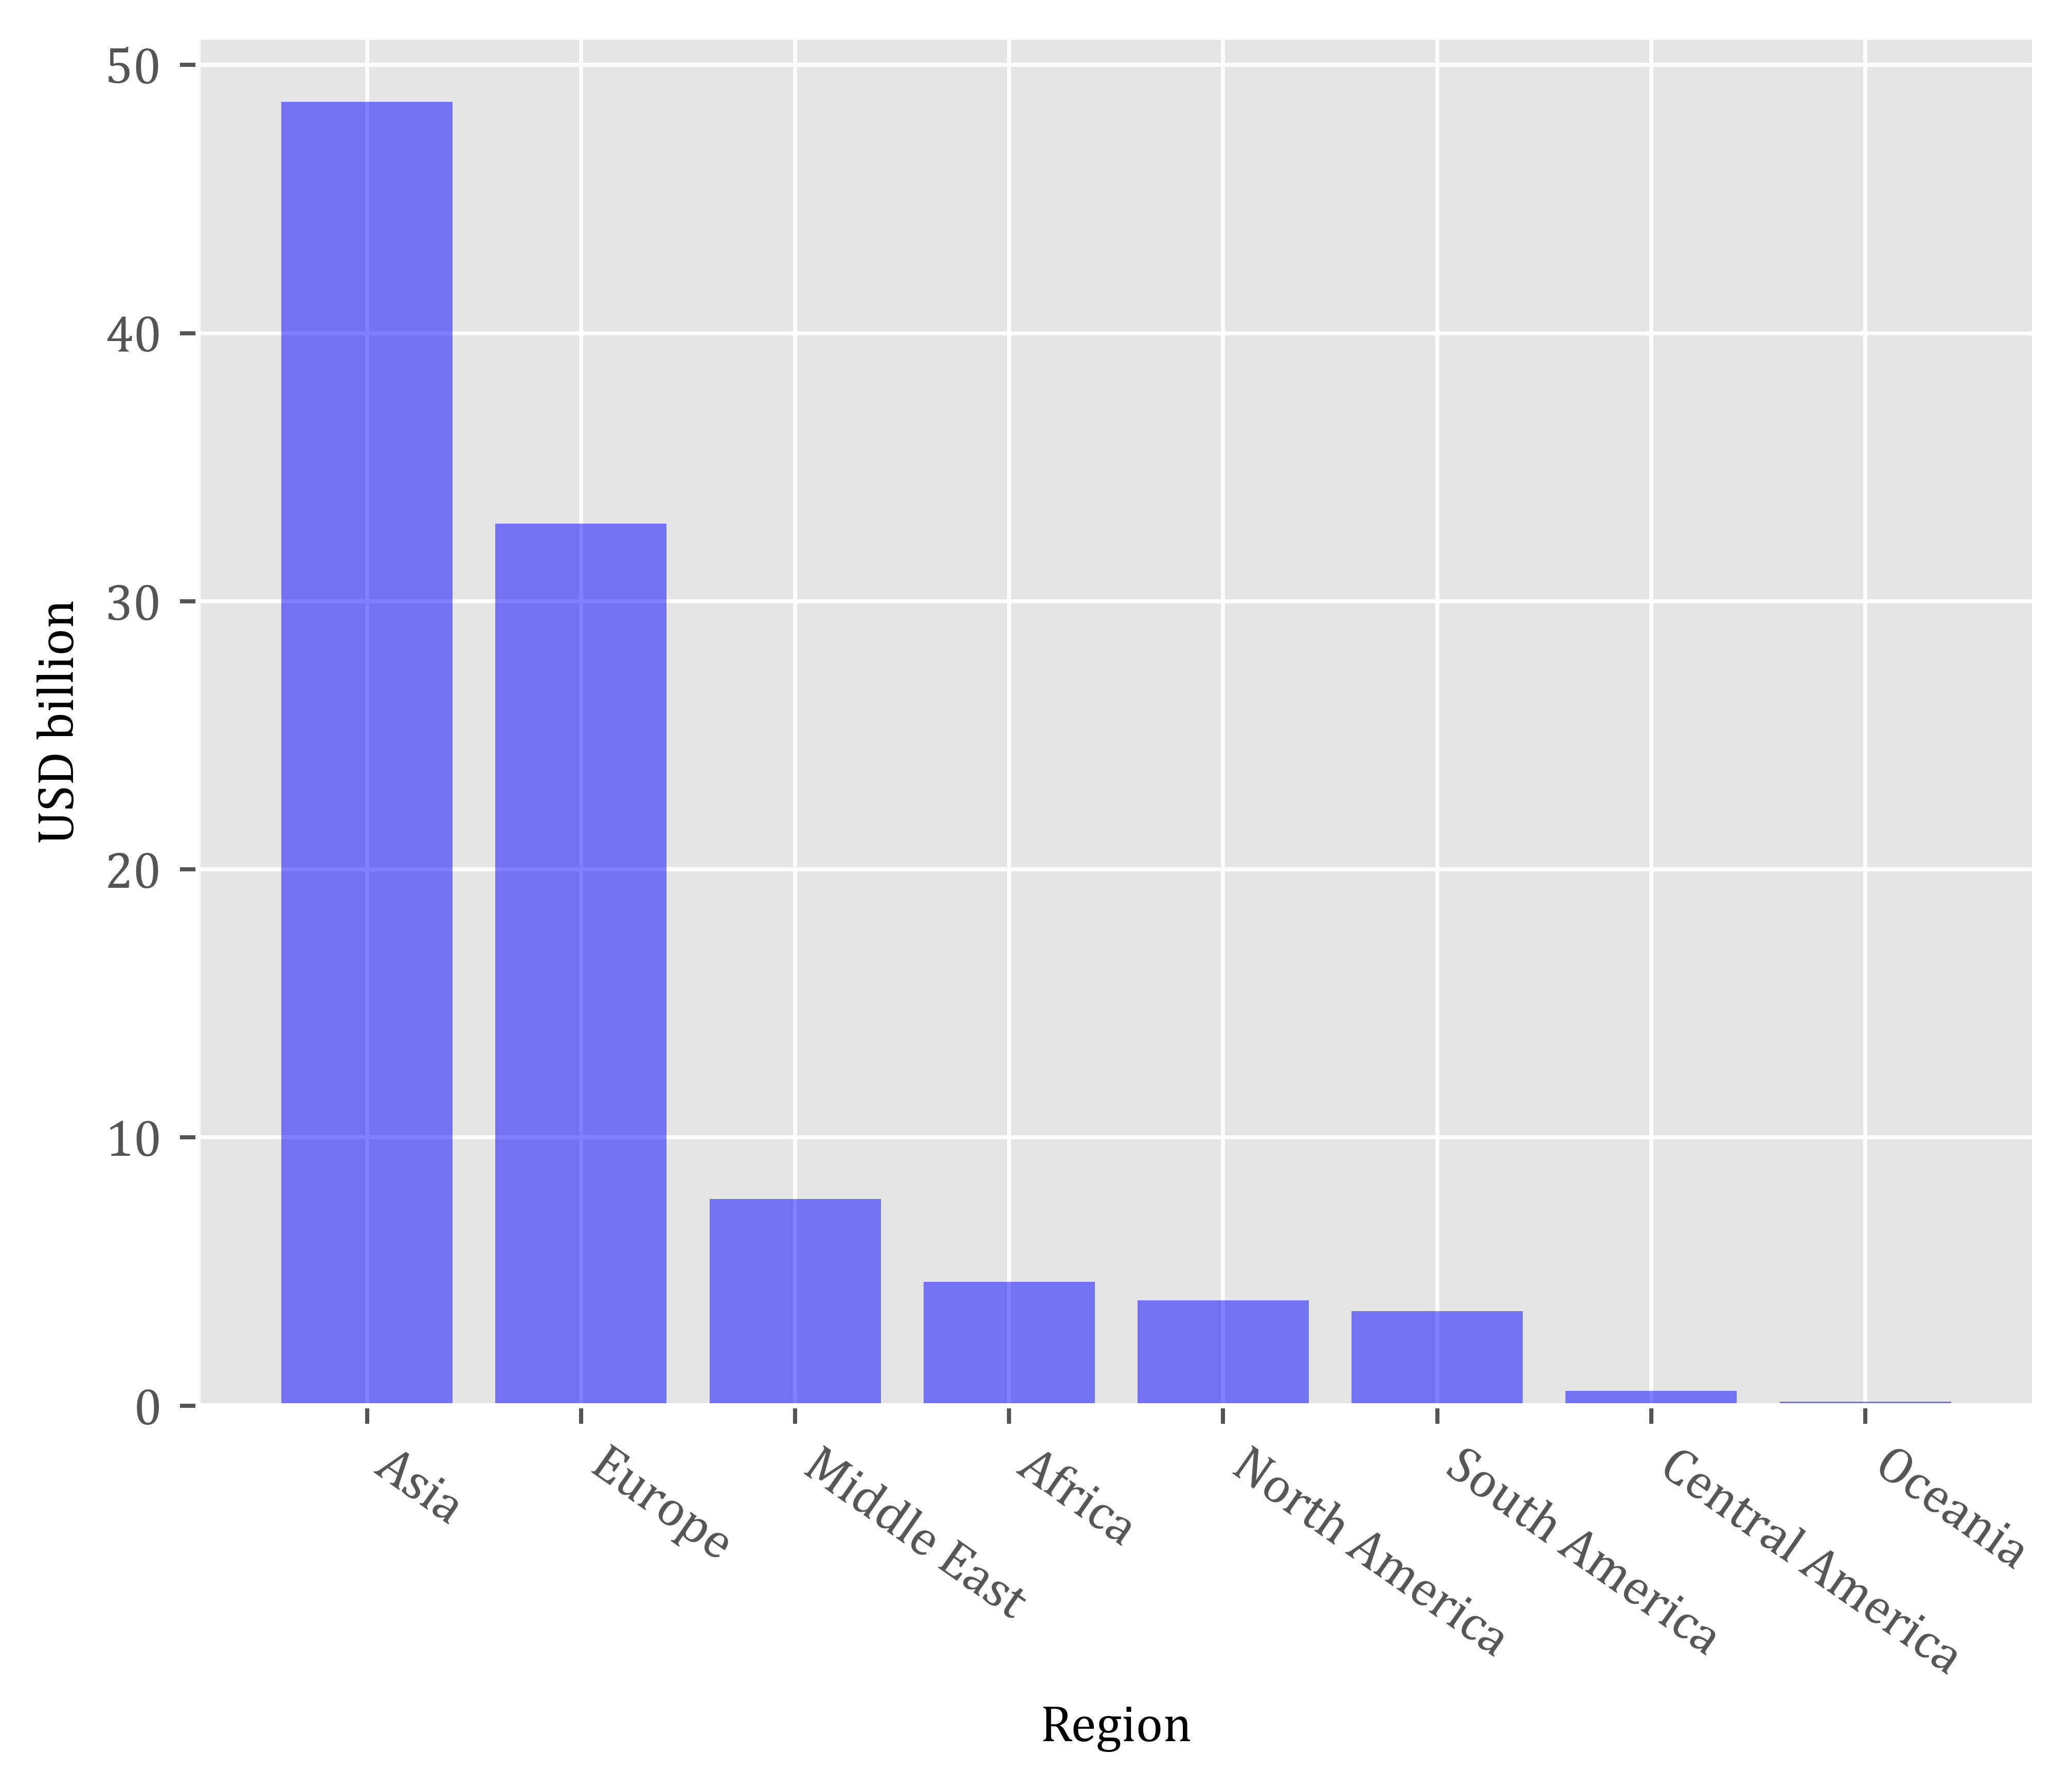

In [11]:
df1 = df1.sort_values(by = valor, ascending = False)

with pd.ExcelWriter(caminho_arquivo, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    df1.to_excel(writer, sheet_name='grafico 4', index=False)

fig, ax = plt.subplots(dpi = 720)

ax.bar(df1[bloco], df1[valor]/1000000000, color = 'blue', alpha = 0.5)

ax.set_xticklabels(df1[bloco],rotation = -35, ha = 'left')

ax.set(xlabel = 'Region',
       ylabel = 'USD billion')

# Gráfico de Percentuais

In [12]:
df1 = df[[bloco,valor,ano]].groupby([ano,bloco], as_index = False).sum()

blocos = df1[bloco].unique()

blocks = ['Central America',
          'North America',
          'South America',
          'Europe',
          'Oceania',
          'Middle East',
          'Africa',
          'Asia']

dic = dict(zip(blocos,blocks))

for i in dic: 
    
    df1.loc[df1[bloco] == i, bloco] = dic[i]

    
df1

,Ano,Bloco Econômico Destino,Valor FOB (US$)
0,1997,Central America,1032902
1,1997,North America,55902142
2,1997,South America,33896490
3,1997,Europe,298052895
4,1997,Oceania,352953
...,...,...,...
195,2021,Europe,2024250093
196,2021,Oceania,10921621
197,2021,Middle East,603009782
198,2021,Africa,353972276


In [13]:
df2 = df1.pivot(index = ano, columns = bloco, values = valor)

totais = df2.sum(axis = 1).values

for i in df2.columns:

    df2[i] = df2[i].values/totais

df2.reset_index()

Bloco Econômico Destino,Ano,Africa,Asia,Central America,Europe,Middle East,North America,Oceania,South America
0,1997,0.027160,0.142819,0.002173,0.626928,0.011294,0.117585,0.000742,0.071298
1,1998,0.017376,0.142225,0.008495,0.586852,0.034203,0.145867,0.000819,0.064163
2,1999,0.027337,0.150359,0.015134,0.509709,0.032360,0.183493,0.000367,0.081240
3,2000,0.008646,0.105590,0.008286,0.689378,0.017516,0.120430,0.000503,0.049652
4,2001,0.024061,0.133329,0.007378,0.595622,0.076788,0.097961,0.000100,0.064762
5,2002,0.019499,0.123364,0.033870,0.596979,0.036502,0.125540,0.000008,0.064239
6,2003,0.024930,0.156939,0.002951,0.624716,0.053884,0.093801,0.000116,0.042663
7,2004,0.039258,0.141494,0.001431,0.595313,0.067519,0.106251,0.000120,0.048613
8,2005,0.050437,0.209757,0.001089,0.580381,0.062273,0.049129,0.000291,0.046644
9,2006,0.077824,0.247994,0.003310,0.527628,0.073596,0.042477,0.000156,0.027015


[(1997.0, 2021.0), Text(0, 0.5, 'Share'), Text(0.5, 0, 'Year')]

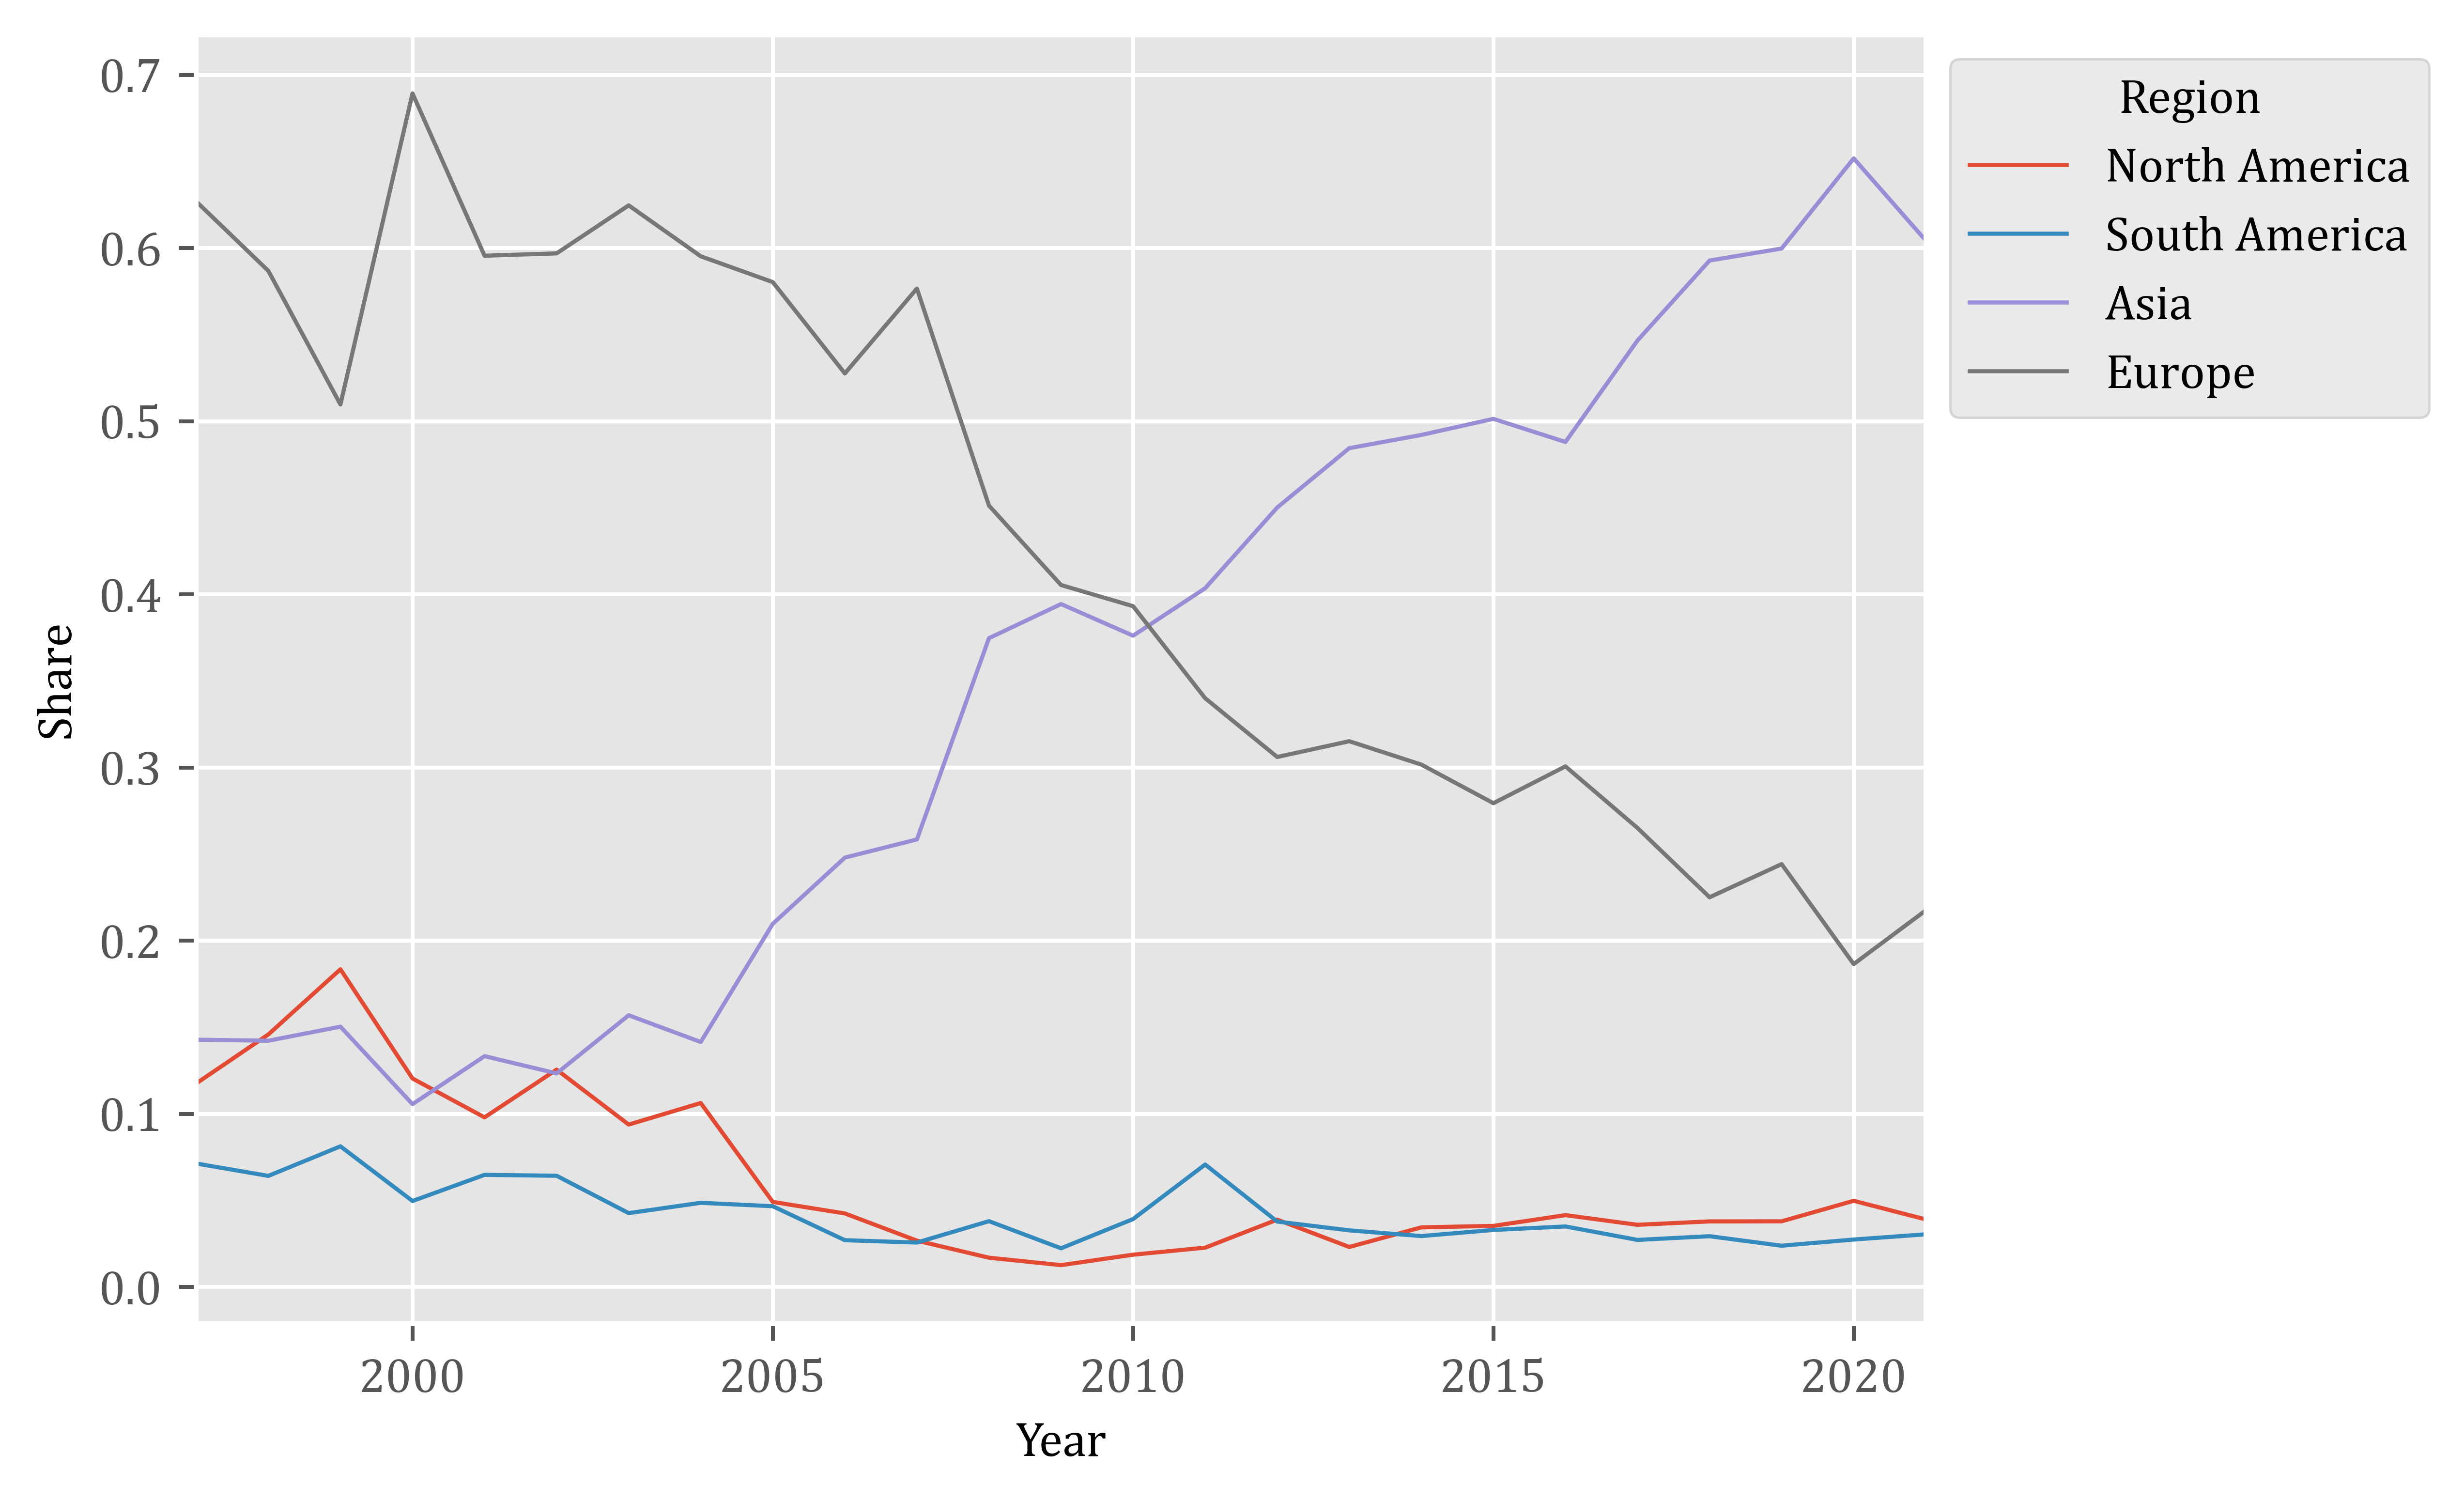

In [14]:
blocos =['North America',
         'South America',
         'Asia',
         'Europe']

# df2 = df2[blocos].reset_index()

with pd.ExcelWriter(caminho_arquivo, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    df2.to_excel(writer, sheet_name='grafico 5', index=False)

fig, ax = plt.subplots(dpi = 720)

for i in blocos: 
    
    ax.plot(df2.index, df2[i], label = i, linewidth = 0.85)
    
ax.legend(bbox_to_anchor = (1,1), loc = 'upper left', title = 'Region')

ax.set(xlim = (1997,2021),
       ylabel = 'Share',
       xlabel = 'Year')



# Gráfico de Linha

In [15]:
df1 = df[[bloco,valor,ano]].groupby([ano,bloco], as_index = False).sum()

blocos = df1[bloco].unique()

blocks = ['Central America',
          'North America',
          'South America',
          'Europe',
          'Oceania',
          'Middle East',
          'Africa',
          'Asia']

dic = dict(zip(blocos,blocks))

for i in dic: 
    
    df1.loc[df1[bloco] == i, bloco] = dic[i]

    
df1

,Ano,Bloco Econômico Destino,Valor FOB (US$)
0,1997,Central America,1032902
1,1997,North America,55902142
2,1997,South America,33896490
3,1997,Europe,298052895
4,1997,Oceania,352953
...,...,...,...
195,2021,Europe,2024250093
196,2021,Oceania,10921621
197,2021,Middle East,603009782
198,2021,Africa,353972276


In [16]:
blocos = ['Asia',
          'Europe']


df2 = df1.pivot(columns = bloco, index = ano, values = valor)[blocos]

for i in blocos: 
    
    coeficientes = np.polyfit(df2.index, df2[i], 10)

    preds = np.polyval(coeficientes, df2.index)

    fit = i + ' ' + 'fit'
    
    df2[fit] = preds
    
df2.reset_index()

with pd.ExcelWriter(caminho_arquivo, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    df2.reset_index().to_excel(writer, sheet_name='grafico 6', index=False)


C:\Users\joaop\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3460: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\joaop\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3460: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


[Text(0.5, 0, 'Year'), Text(0, 0.5, 'USD billion')]

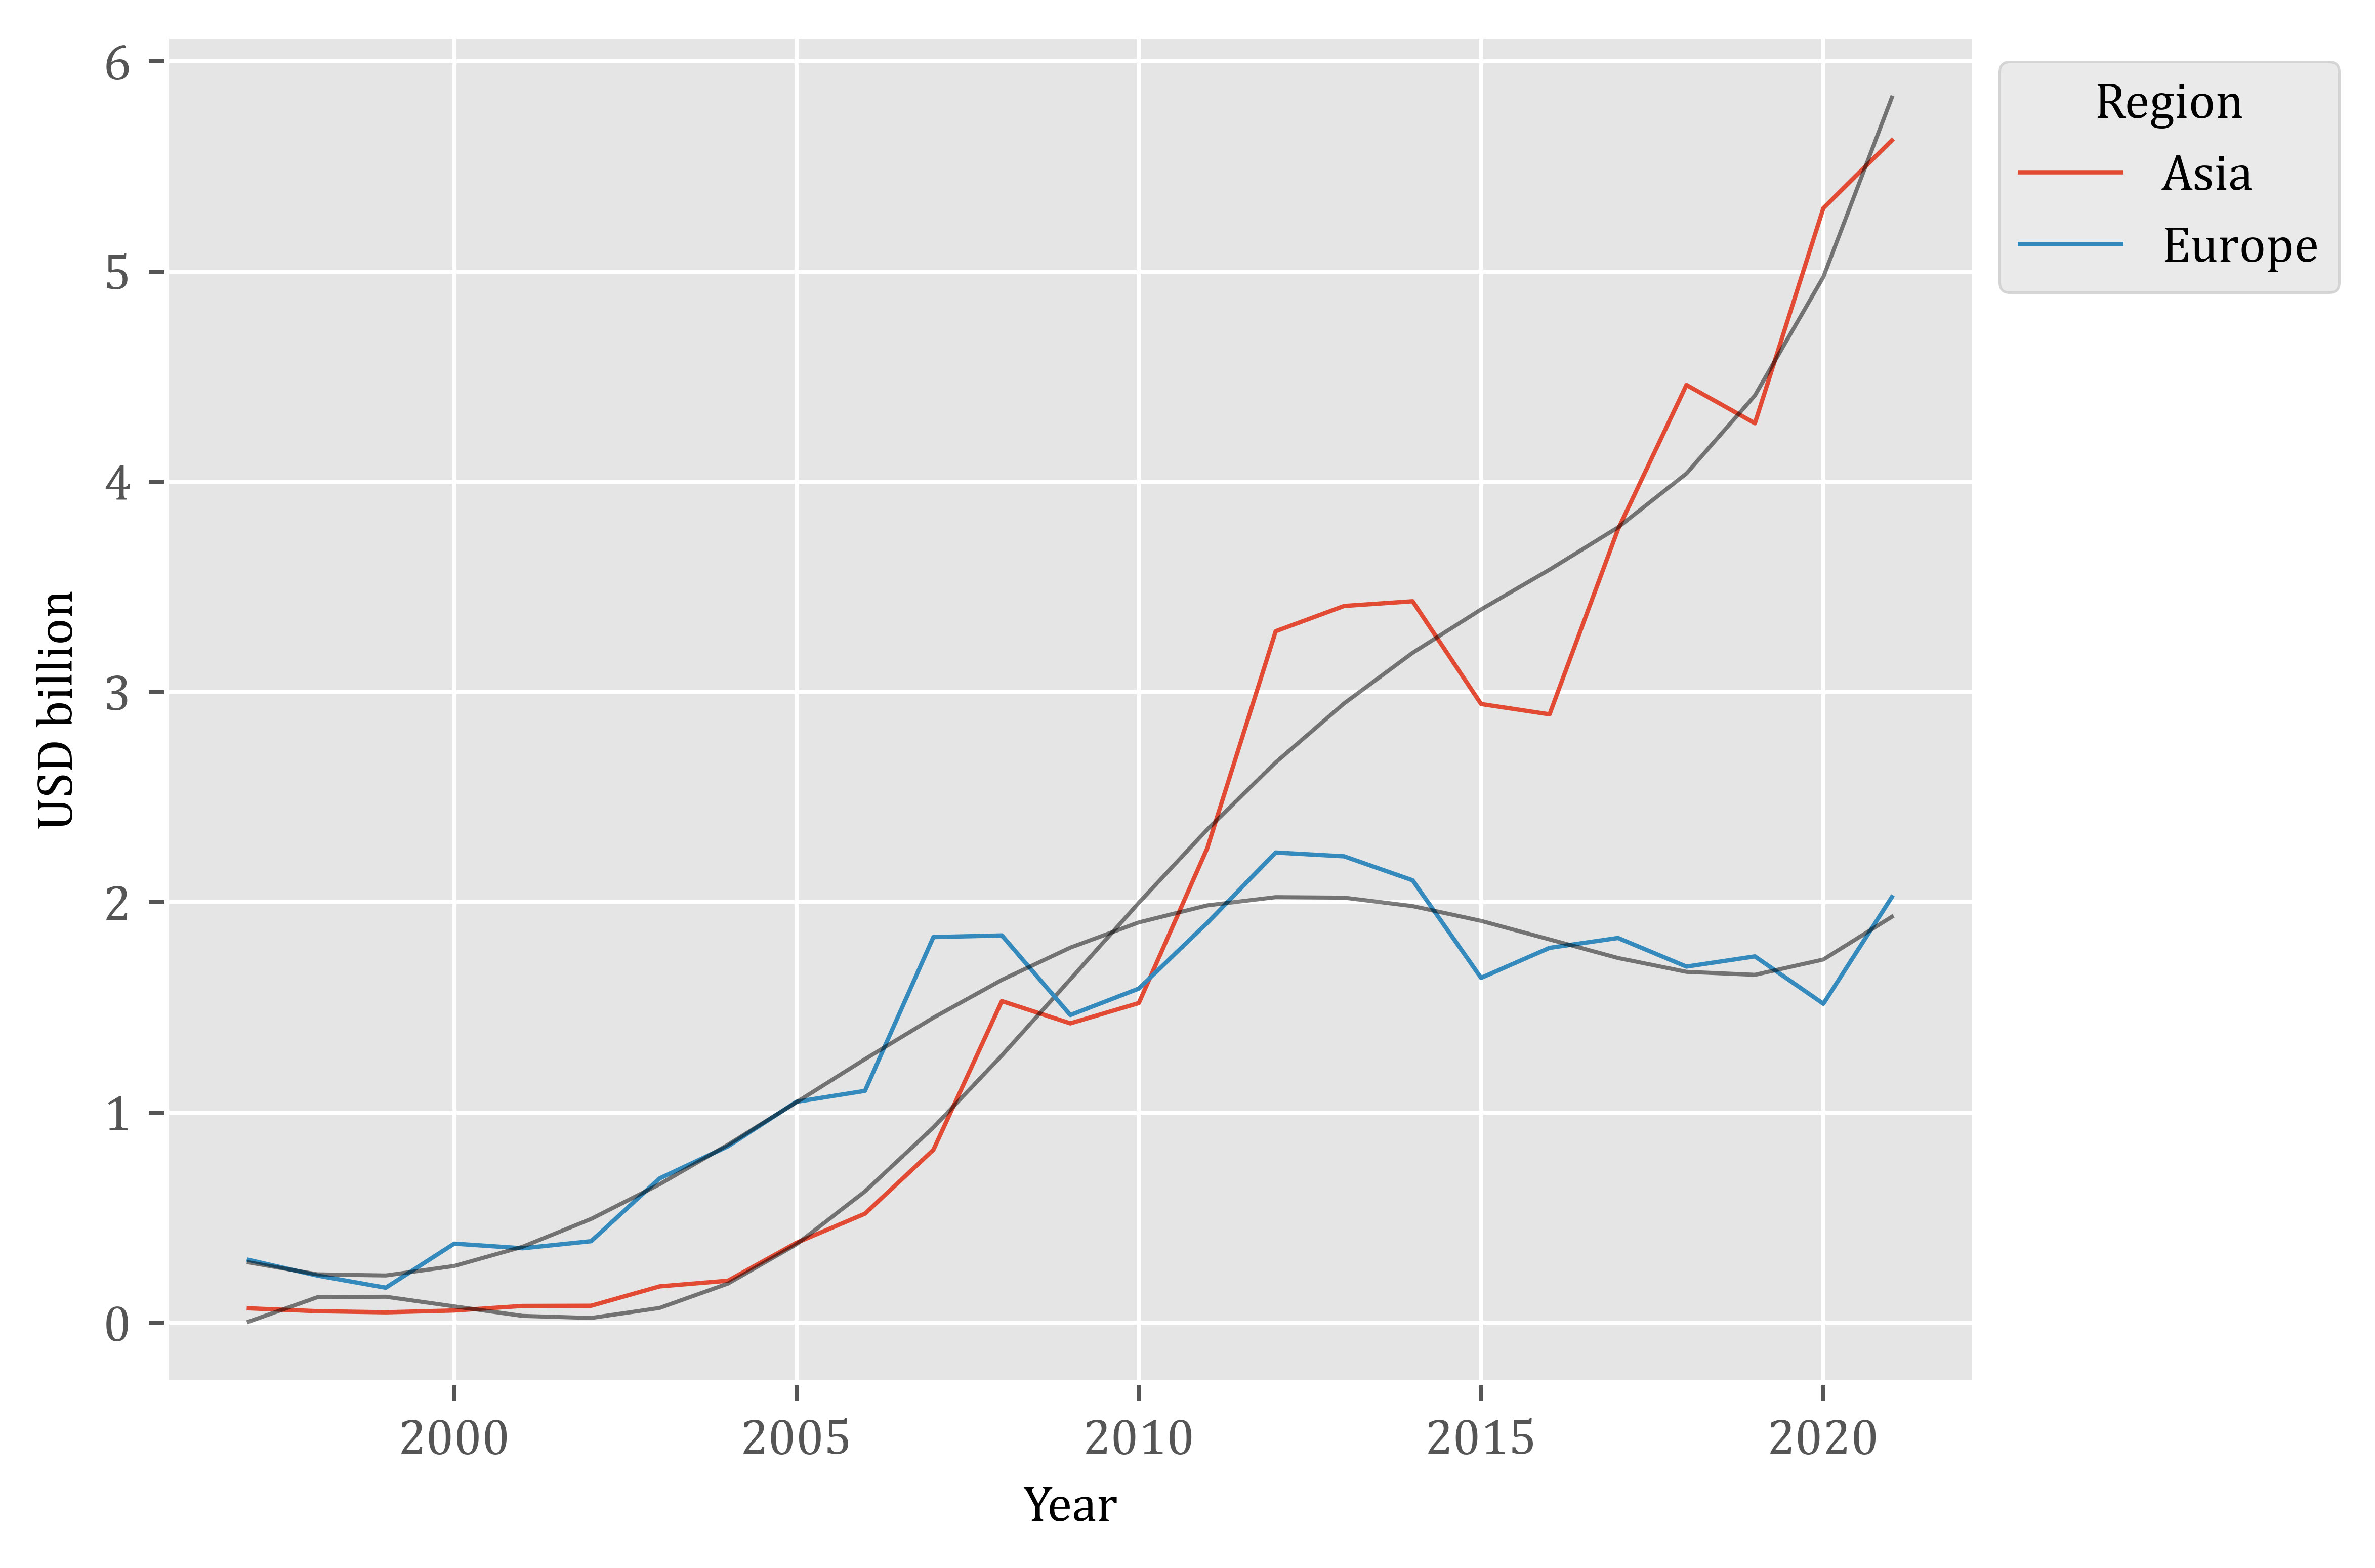

In [17]:
fig, ax = plt.subplots(dpi = 720)

for i in blocos:
    
    ax.plot(df2.index, df2[i]/1000000000, label = i, linewidth = 0.85)
    
    fit = i + ' ' + 'fit'
    
    ax.plot(df2.index, df2[fit]/1000000000, color = 'black', linewidth = 0.8, alpha = 0.5)

    
ax.legend(bbox_to_anchor = (1,1), loc = 'upper left', title = 'Region')

ax.set(xlabel = 'Year',
       ylabel = 'USD billion')

# HHI Países

In [18]:
pais = 'País Destino'

df1 = df[[pais,valor,ano]].groupby([pais,ano], as_index = False).sum()

df1

,País Destino,Ano,Valor FOB (US$)
0,Afeganistão,2006,263122
1,Afeganistão,2007,150924
2,Afeganistão,2008,247224
3,Afeganistão,2009,111677
4,Afeganistão,2010,131643
...,...,...,...
3309,Índia,2017,390576889
3310,Índia,2018,314789645
3311,Índia,2019,81407297
3312,Índia,2020,106061740


C:\Users\joaop\AppData\Local\Temp\ipykernel_26652\764432724.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.201117937940909' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2.loc[df2[ano] == i, 'HHI'] = HHI(df1.loc[df1[ano] == i,valor])


[Text(0.5, 0, 'Year'), Text(0, 0.5, 'HHI'), (1997.0, 2021.0)]

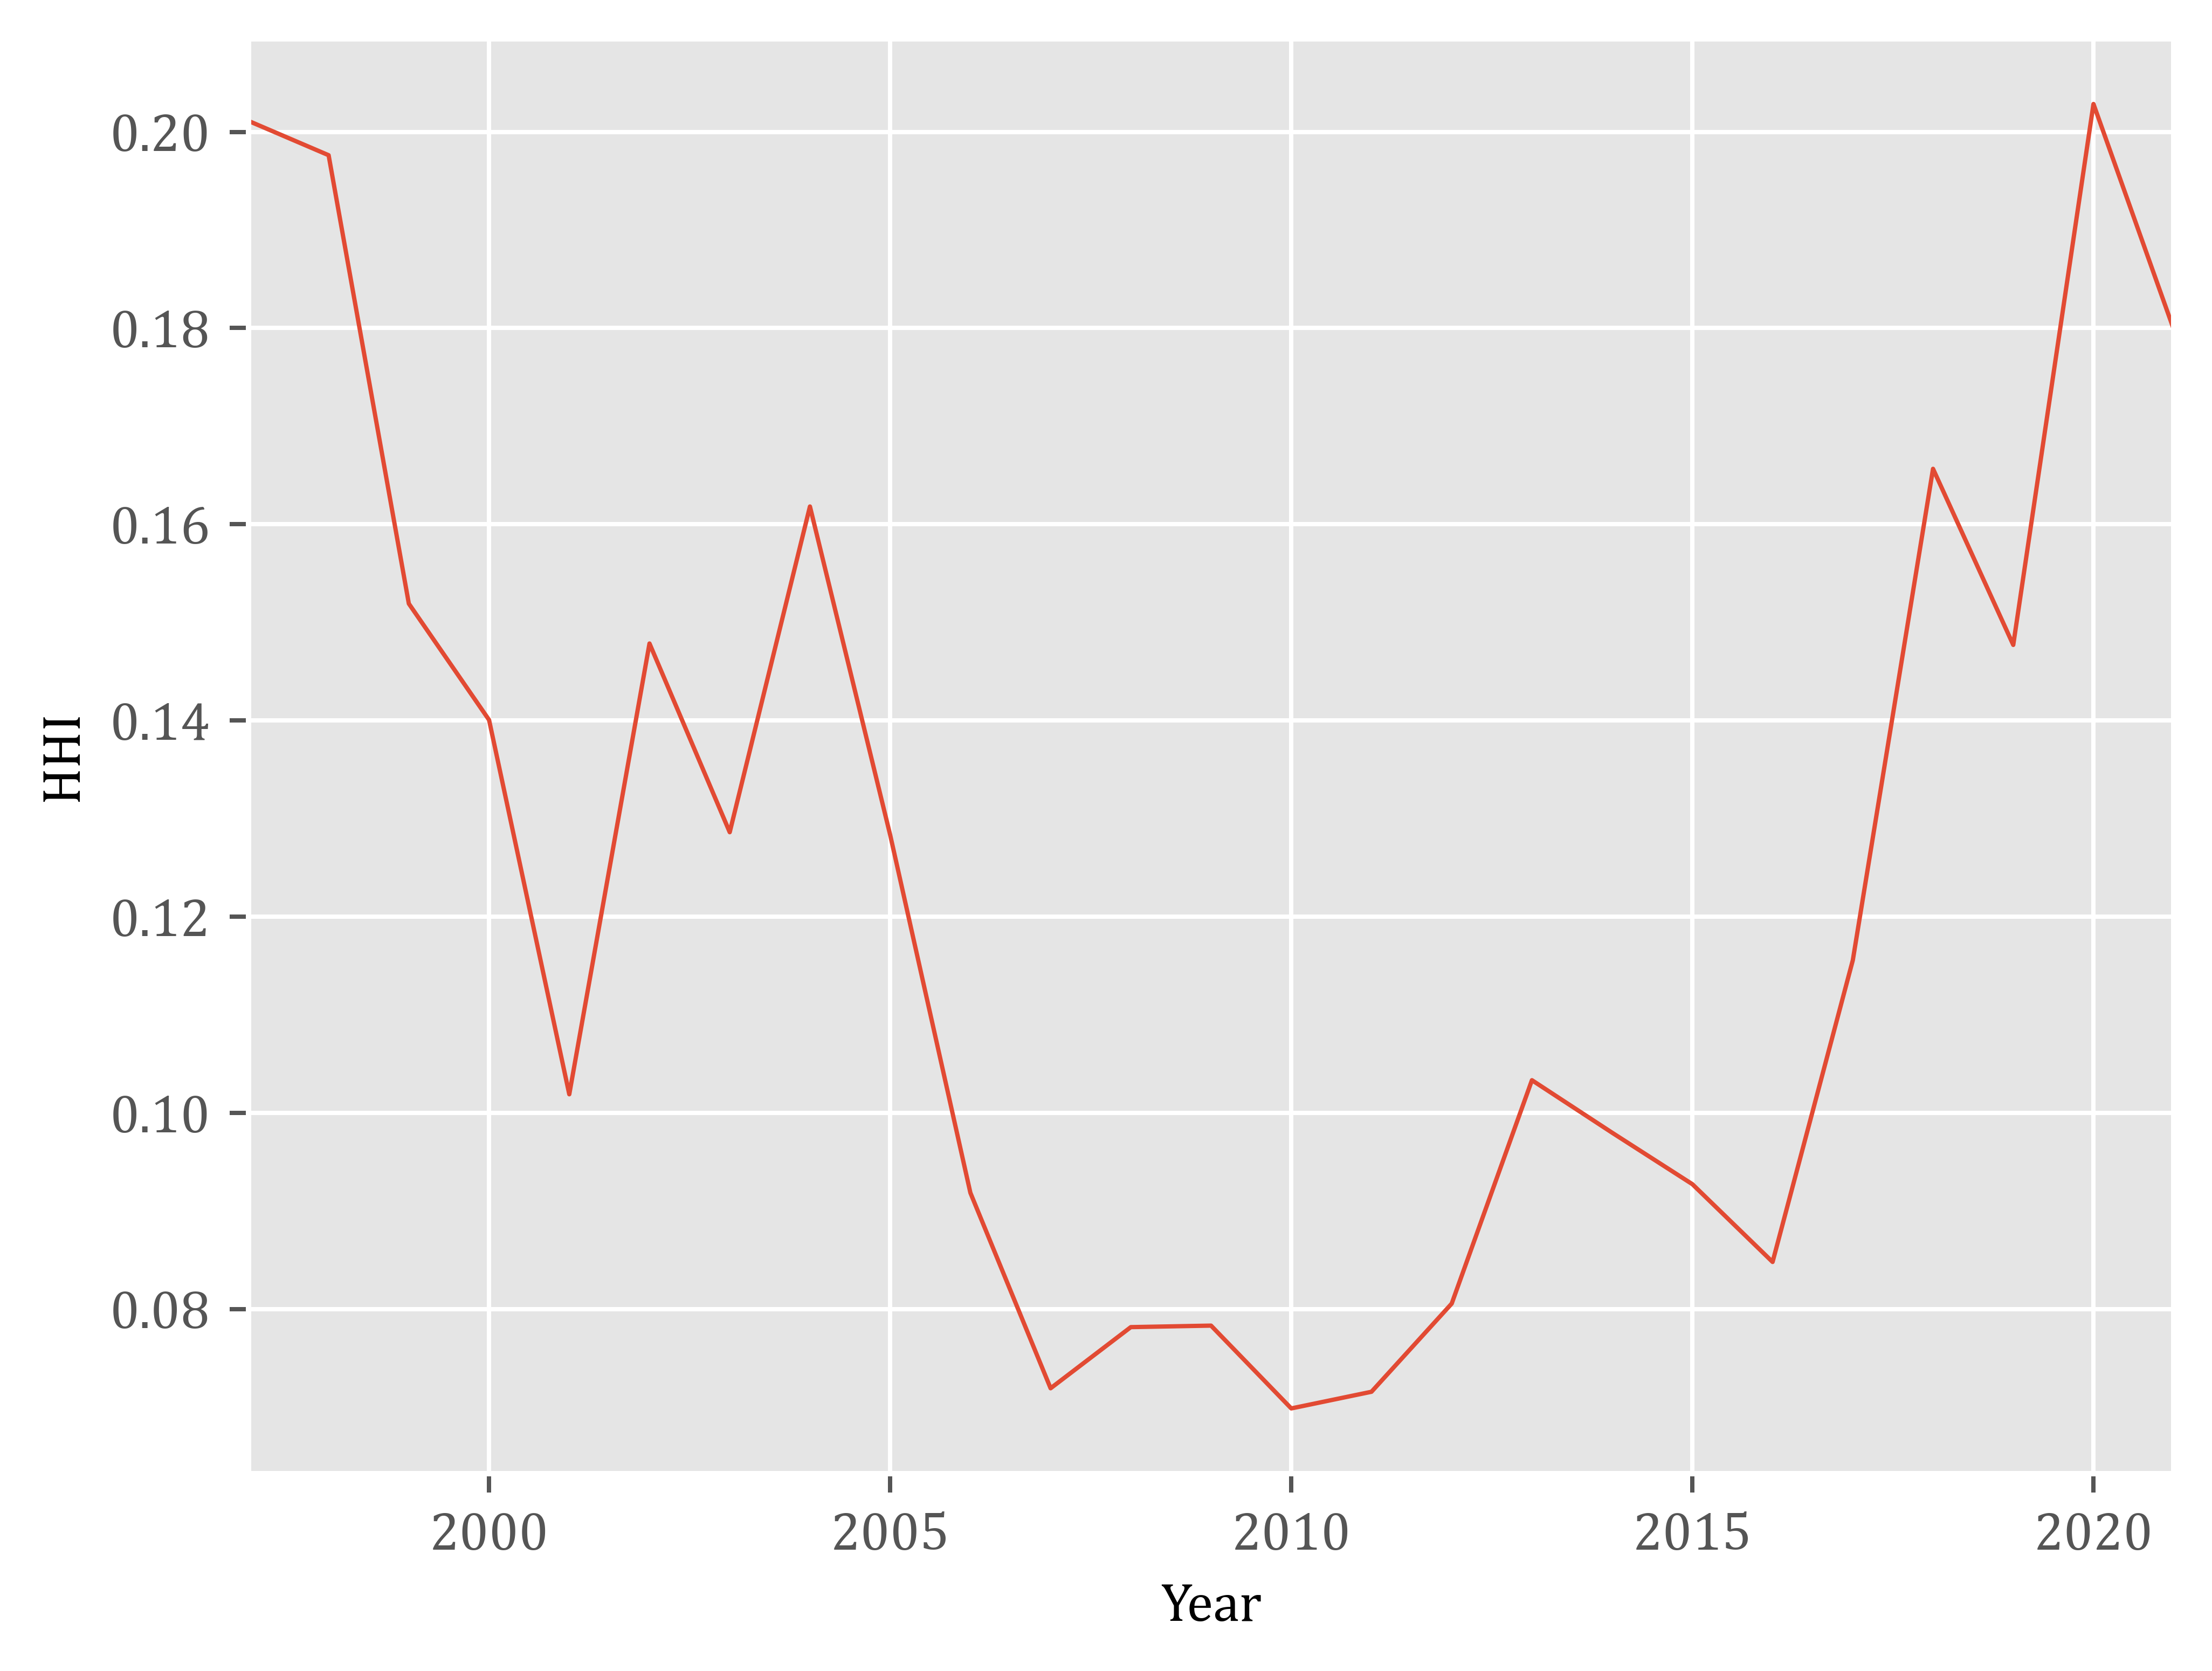

In [19]:
df2 = df1[[ano,valor]].groupby(ano, as_index = False).sum()

df2['HHI'] = 0

for i in df2[ano]:

    df2.loc[df2[ano] == i, 'HHI'] = HHI(df1.loc[df1[ano] == i,valor])

with pd.ExcelWriter(caminho_arquivo, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    df2.to_excel(writer, sheet_name='grafico 7', index=False)

fig, ax = plt.subplots(dpi = 720)

ax.plot(df2[ano], df2['HHI'], linewidth = 0.8),

ax.set(xlabel = 'Year',
       ylabel = 'HHI',
       xlim = (1997,2021))

# Exportações por categoria

In [20]:
produtos = 'Descrição - Classificação Tecnológica'

df1 = df[[produtos,valor,ano]].groupby([ano,produtos], as_index = False).sum()

dicionario = {
    'Manufaturas Baseadas em Recursos Primários': 'Resource-Based Manufactures',
    'Manufaturas de Alta Tecnologia': 'High-Technology Manufactures',
    'Manufaturas de Baixa Tecnologia': 'Low-Technology Manufactures',
    'Manufaturas de Média Tecnologia': 'Medium-Technology Manufactures',
    'Outros': 'Others',
    'Produtos Primários': 'Primary Products'
}

for i in dicionario: 
    
    df1.loc[df1[produtos] == i,produtos] = dicionario[i]

In [21]:
df2 = df1.pivot(index = ano, columns = produtos, values = valor)

totais = df2.sum(axis = 1).values

for i in df2.columns:

    df2[i] = df2[i].values/totais

with pd.ExcelWriter(caminho_arquivo, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    df2.reset_index().to_excel(writer, sheet_name='grafico 8', index=False)


[(1997.0, 2021.0), Text(0, 0.5, 'Share'), Text(0.5, 0, 'Year')]

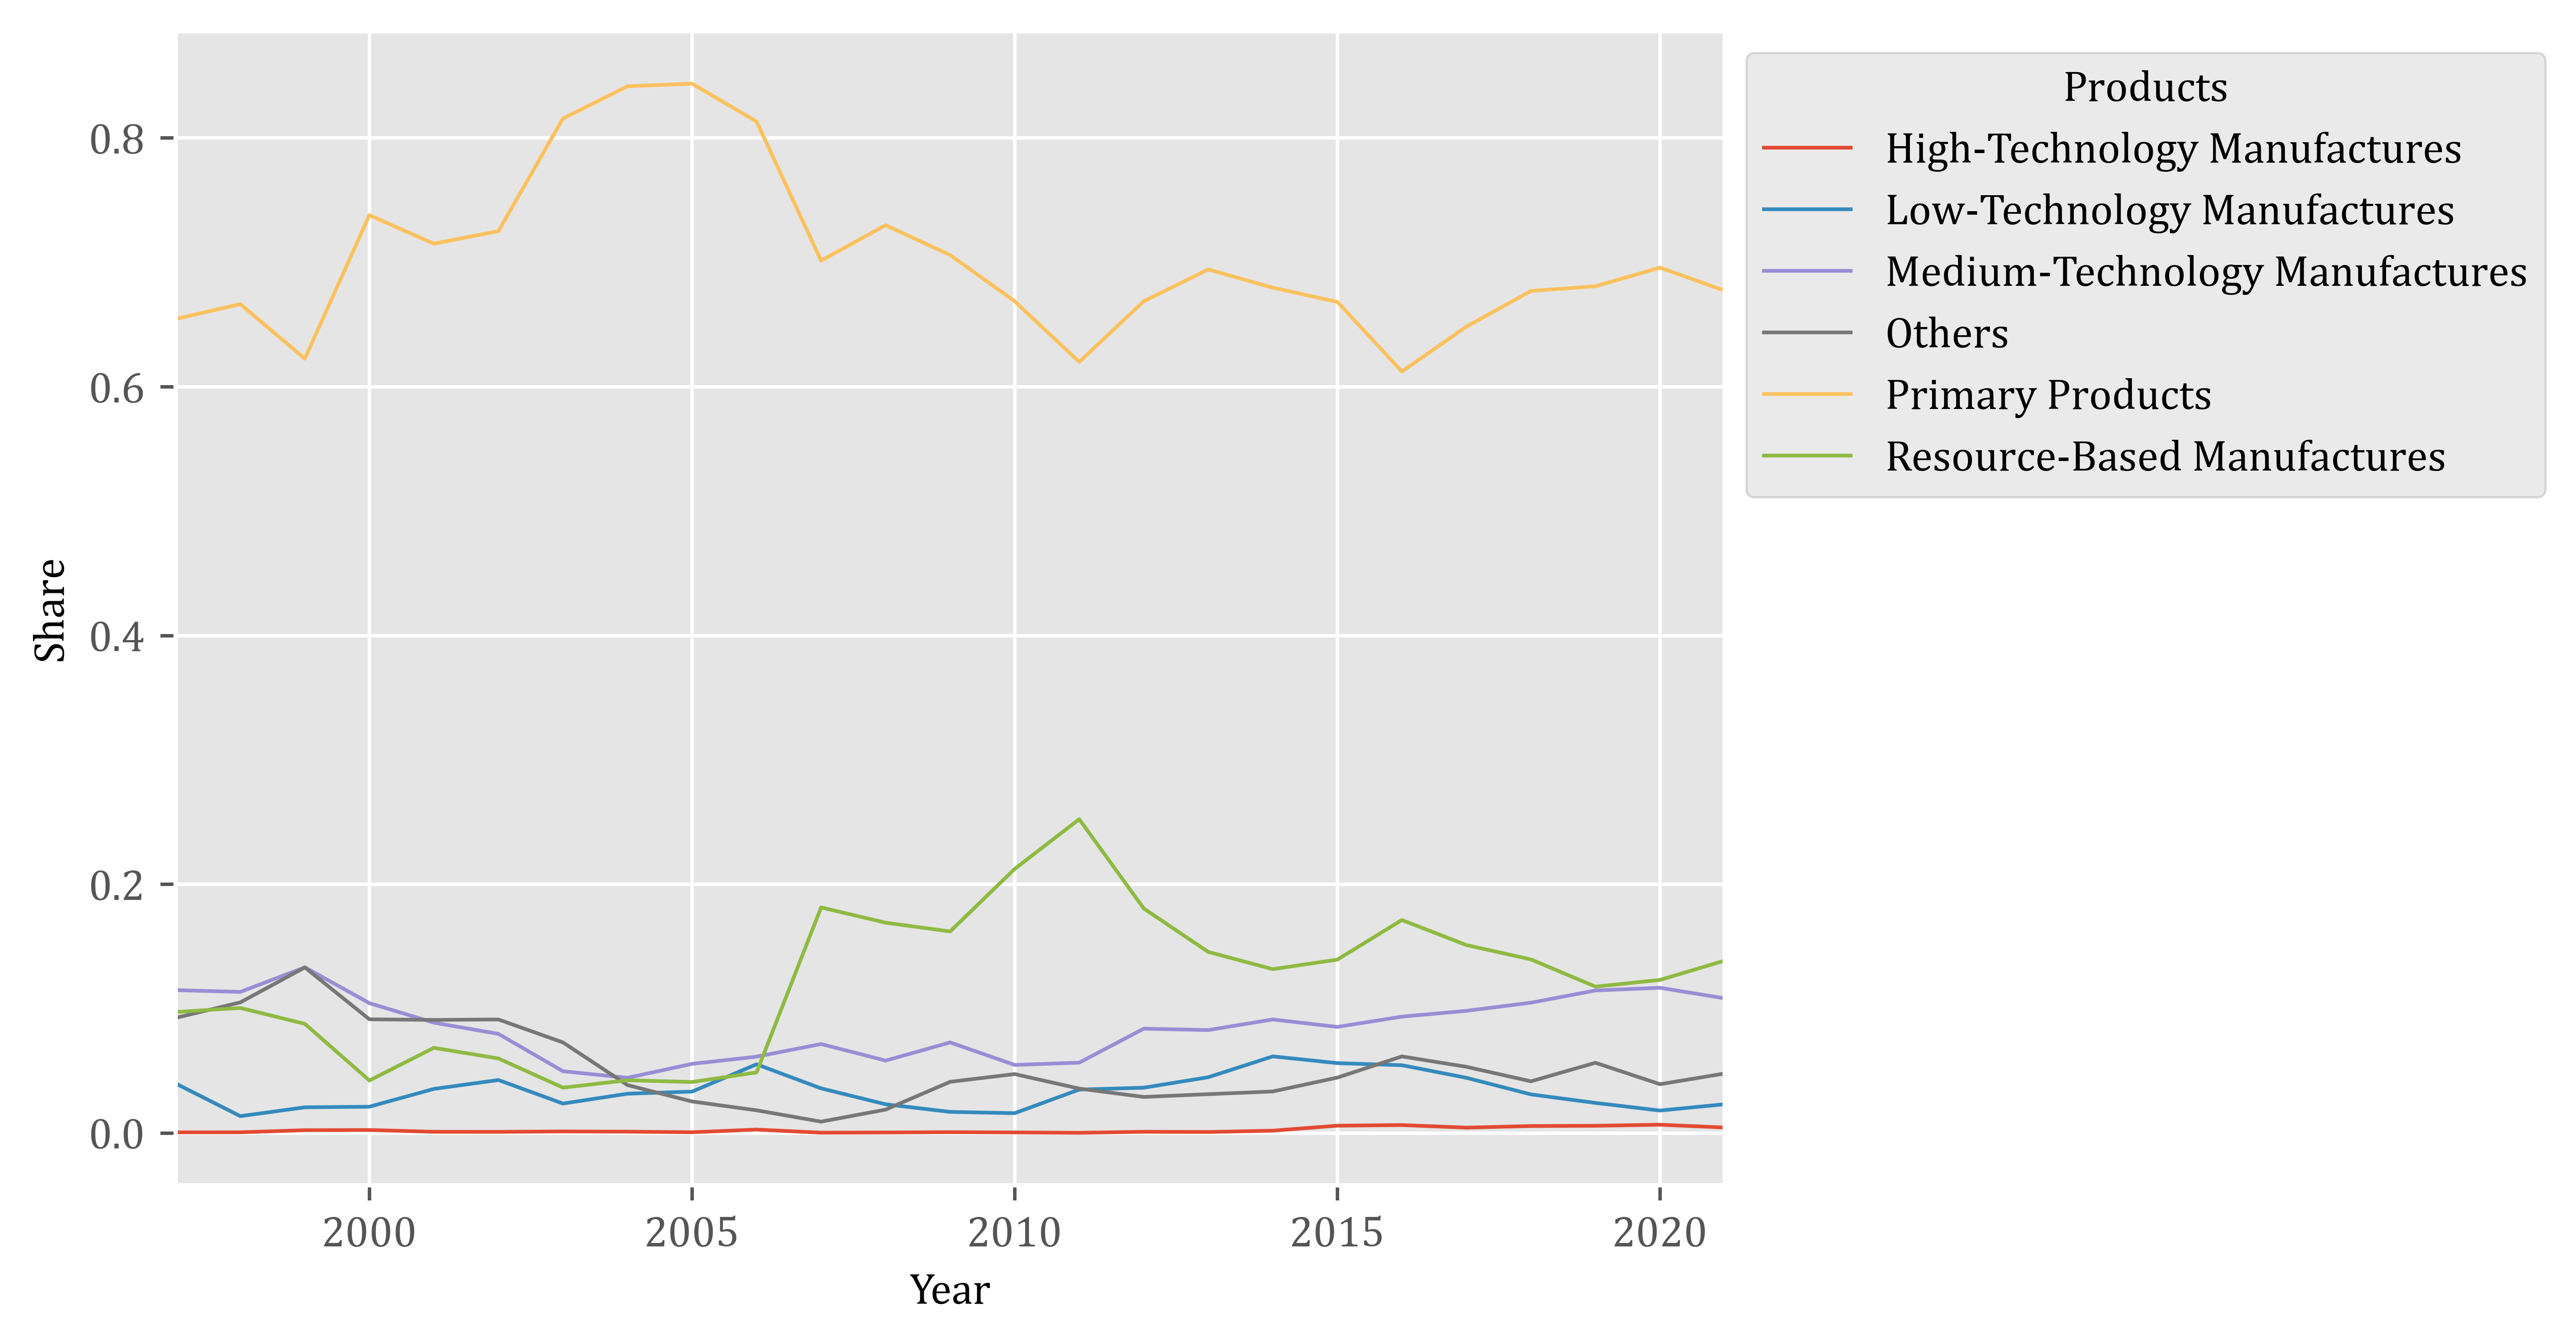

In [22]:
fig, ax = plt.subplots(dpi = 720)

for i in df2.columns: 
    
    ax.plot(df2.index, df2[i], label = i, linewidth = 0.85)
    
ax.legend(bbox_to_anchor = (1,1), loc = 'upper left', title = 'Products')

ax.set(xlim = (1997,2021),
       ylabel = 'Share',
       xlabel = 'Year')


# HHI categorias tecnologia 

In [23]:
categoria = 'Código - Classificação Tecnológica'

df1 = df[[categoria,valor,ano]].groupby([categoria,ano], as_index = False).sum()

df1

,Código - Classificação Tecnológica,Ano,Valor FOB (US$)
0,HT,1997,285166
1,HT,1998,242445
2,HT,1999,753758
3,HT,2000,1349481
4,HT,2001,618972
...,...,...,...
145,RB,2017,1043523937
146,RB,2018,1050695545
147,RB,2019,840001459
148,RB,2020,1001781331


C:\Users\joaop\AppData\Local\Temp\ipykernel_26652\1657340845.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.46139887937743196' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2.loc[df2[ano] == i, 'HHI'] = HHI(df1.loc[df1[ano] == i,valor])


[Text(0.5, 0, 'Year'), Text(0, 0.5, 'HHI'), (1997.0, 2021.0)]

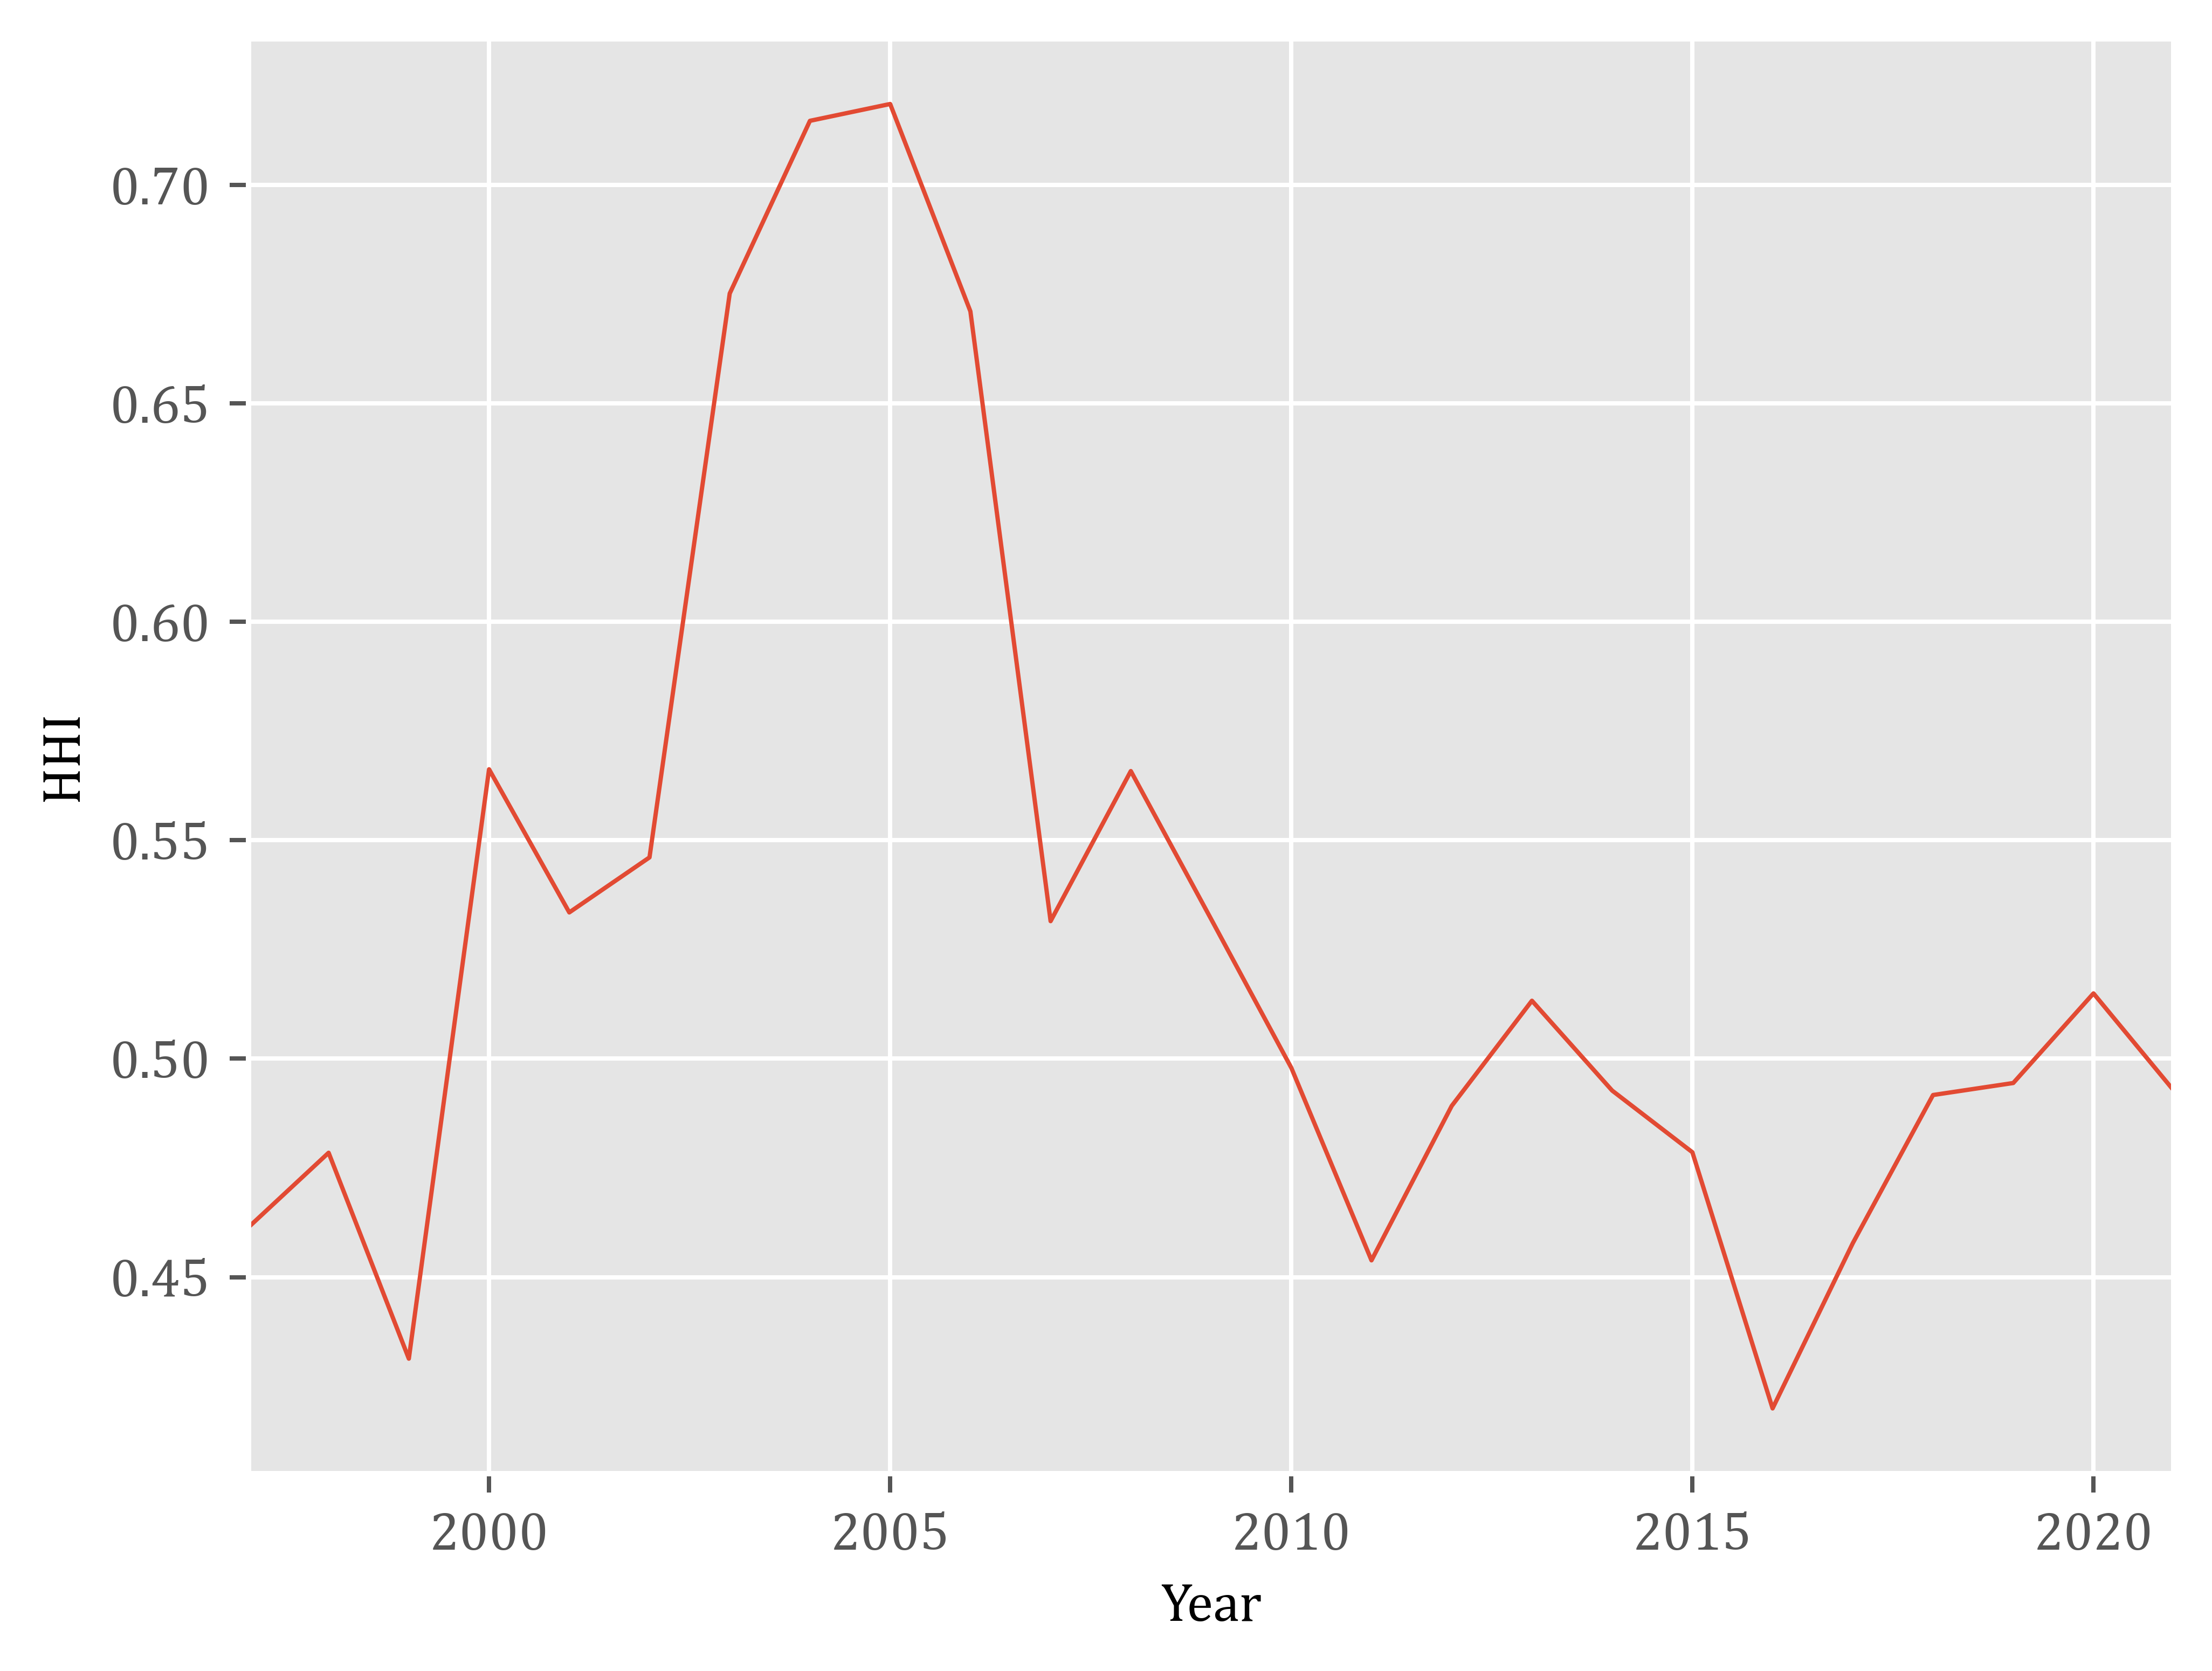

In [24]:
df2 = df1[[ano,valor]].groupby(ano, as_index = False).sum()

df2['HHI'] = 0


for i in df2[ano]:

    df2.loc[df2[ano] == i, 'HHI'] = HHI(df1.loc[df1[ano] == i,valor])


with pd.ExcelWriter(caminho_arquivo, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    df2.to_excel(writer, sheet_name='grafico 9', index=False)


fig, ax = plt.subplots(dpi = 720)

ax.plot(df2[ano], df2['HHI'], linewidth = 0.8),

ax.set(xlabel = 'Year',
       ylabel = 'HHI',
       xlim = (1997,2021))

# HHI SH2

In [25]:
SH2 = 'Código SH2'

df1 = df[[SH2,valor,ano]].groupby([SH2,ano], as_index = False).sum()

df1

,Código SH2,Ano,Valor FOB (US$)
0,1,1997,55146
1,1,1998,151138
2,1,1999,106570
3,1,2000,124000
4,1,2001,214400
...,...,...,...
1752,99,2010,232887
1753,99,2012,77913
1754,99,2014,37708
1755,99,2015,197176


C:\Users\joaop\AppData\Local\Temp\ipykernel_26652\531936676.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.1823149151026183' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2.loc[df2[ano] == i, 'HHI'] = HHI(df1.loc[df1[ano] == i,valor])


[Text(0.5, 0, 'Year'), Text(0, 0.5, 'HHI'), (1997.0, 2021.0)]

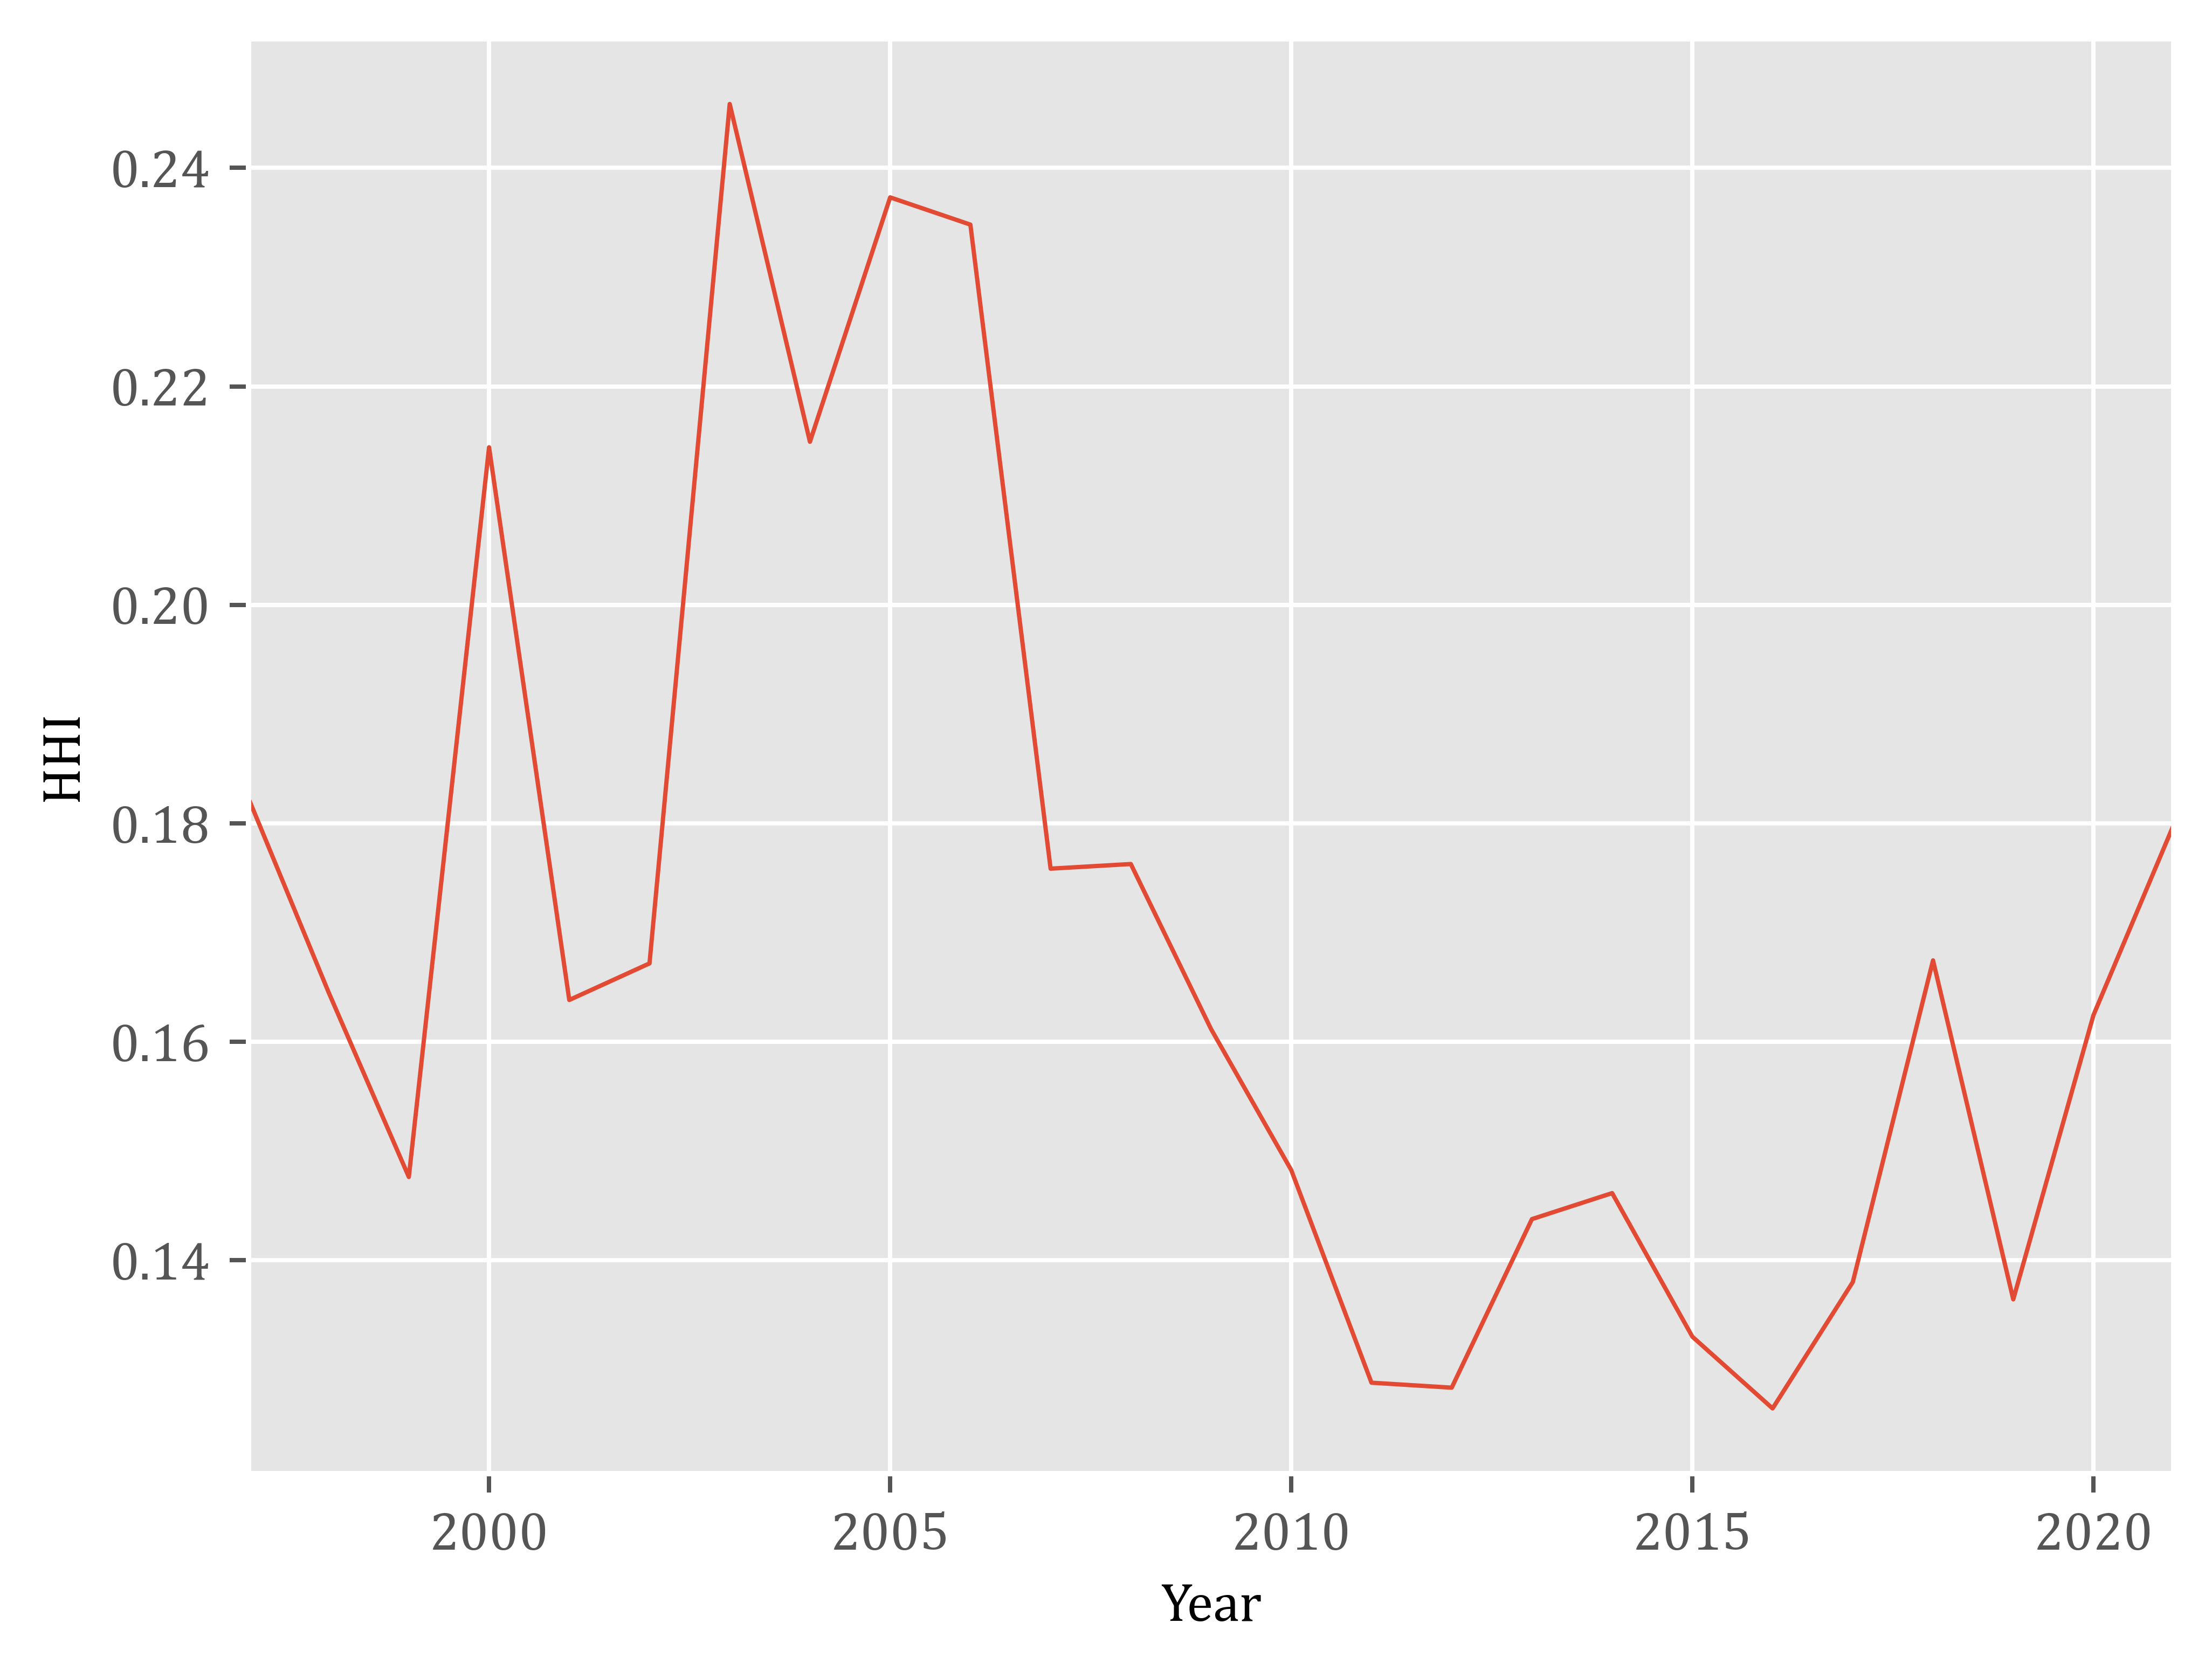

In [26]:
df2 = df1[[ano,valor]].groupby(ano, as_index = False).sum()

df2['HHI'] = 0

for i in df2[ano]:

    df2.loc[df2[ano] == i, 'HHI'] = HHI(df1.loc[df1[ano] == i,valor])

with pd.ExcelWriter(caminho_arquivo, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    df2.to_excel(writer, sheet_name='grafico 10', index=False)

fig, ax = plt.subplots(dpi = 720)

ax.plot(df2[ano], df2['HHI'], linewidth = 0.8),

ax.set(xlabel = 'Year',
       ylabel = 'HHI',
       xlim = (1997,2021))